In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [2]:
def plot_one_result_pval_var(ax,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None,hwidth=None,label_prefix=""):
    #Getting the result dict
    if clambda!=None:
        if t0ate!=None and hwidth!=None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                                                              hwidth,
                                      )
                    )
        elif t0ate!=None and hwidth==None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
    else:
        #This is not being used now. We directly pass the fname and telambda inside the clambda
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=main_enum,
                                      fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          ate_noise,
                                                                          telambda,
                                  )
                )
    
    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [result_dict[pval][plot_item]["mean"] for pval in pval_list]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label=label_prefix+"ate_noise={}".format(ate_noise),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [3]:
def plot_one_result_ate_pval_pair(ax,plot_item_list,ate_noise_list,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None):
    #Getting the result dict
    #Getting the result dict for all the ate noise also
    all_result_dict=defaultdict(dict)
    for ate_noise in ate_noise_list:
        if clambda!=None:
            if t0ate!=None:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  t0ate,
                                                                                  t1ate,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
            else:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              ate_noise,
                                                                              telambda,
                                      )
                    )

    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [all_result_dict[ate_noise][pval][plot_item]["mean"] for ate_noise,pval in zip(ate_noise_list,pval_list)]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label="ate_noise={}".format("stage1"),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [22]:
def plot_one_result_timeline(ax,plot_item_list,run_list,pval_list,ate_list,fname_pattern,tidx,title,num_topics=1,plot_upto=-1,no_plot_mode=False,print_best_result=True):
    #Getting the timeline
    result_dict_timeline = get_all_result_timeline_stage2(
                                            run_list= run_list,
                                            pval_list=pval_list,
                                            ate_list = ate_list,
                                            fname_pattern=fname_pattern
    )
#     print(result_dict_timeline)
    best_result_pval_var = {}
    for pval in pval_list:
        best_result_pval_var[pval] = get_best_interation_indo_ood(result_dict_timeline,num_topics,plot_upto,pval,print_best_result)
        
    if no_plot_mode==True:
#         print(fname_pattern)
        return best_result_pval_var
            
    
#     print(result_dict_timeline)
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        
        #Getting the timeline item
        for pval in pval_list:
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"][0:plot_upto]
            yerr= result_dict_timeline[pval][plot_item]["std"][0:plot_upto]
            xval = range(len(item_pval_yval_timeline))

            #Plotting the item
            ax[pidx,tidx].errorbar(xval,item_pval_yval_timeline,yerr,label="{}+pval={}".format(title,pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
            ax[pidx,tidx].set_xlabel("epoch")
            ax[pidx,tidx].set_ylabel(plot_item)
            
            if "pdelta" in plot_item:
                ax[pidx,tidx].set_ylim(0,0.75)
            elif "te_loss" in plot_item:
                pass
            else:
                ax[pidx,tidx].set_ylim(0.0,1.09)
        
#             if "pdelta" not in plot_item or "loss" not in plot_item or "norm" not in plot_item:
#                 ax[pidx,0].set_ylim(0.0,1.1)
            
#             if "pdelta" in plot_item or "smin" in plot_item:
#                 pass
#             else:
            ax[pidx,tidx].legend()
            ax[pidx,tidx].grid(True)
            ax[pidx,tidx].set_title(title)
        
#         if plot_item=="emb_norm":
#             continue
    
    return best_result_pval_var

In [5]:
def get_best_interation_indo_ood(result_dict_timeline,num_topics,num_epoch,pval,print_best_result):
    #Getting the number of iteration
#     num_epoch = result_dict_timeline["inf"]["acc:main"]["mean"]
    
    #Going over the iteration and selecting the best iteation based on mean indo and ood
    indo = result_dict_timeline[pval]["topic0_smaj"]["mean"][0:num_epoch]
    indo_val_mat = result_dict_timeline[pval]["topic0_smaj"]["val_mat"][:,0:num_epoch]
    indo_std = result_dict_timeline[pval]["topic0_smaj"]["std"][0:num_epoch]
    
    #If we want to use the overall accuracy instead of majority group.
#     indo = result_dict_timeline[pval]["acc:main"]["mean"][0:num_epoch]
#     indo_val_mat = result_dict_timeline[pval]["acc:main"]["val_mat"][:,0:num_epoch]
#     indo_std = result_dict_timeline[pval]["acc:main"]["std"][0:num_epoch]
    
    acc_sum = indo_val_mat.copy()
    for tidx in range(num_topics):
        ood_val_mat = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["val_mat"][:,0:num_epoch]
        acc_sum += ood_val_mat
    acc_sum_mean = acc_sum/(num_topics+1)
    crit = np.mean(acc_sum_mean,axis=0)
    crit_std = np.std(acc_sum_mean,axis=0)
    #Getting the max position and the guy
    best_loc = np.argmax(crit)
    
    
    #Initializing the best result dict
    result_dict={}
    result_dict["overall"]=crit[best_loc]
    result_dict["overall_std"]=crit_std[best_loc]
    result_dict["indo"]=indo[best_loc]
    result_dict["indo_std"]=indo_std[best_loc]
    
    if print_best_result:
        print("=============================================")
        print("Getting the best setting for pval:{}".format(pval))    
        print("\n\nbest loc :",best_loc)
        print("overall_avg_acc: ",np.around(result_dict["overall"],decimals=2))
        print("best indo:",np.around(result_dict["indo"],decimals=2))
    for tidx in range(num_topics):
        ood = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["mean"][0:num_epoch]
        ood_std = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["std"][0:num_epoch]
        topic_pdelta = result_dict_timeline[pval]["topic{}_pdelta_all".format(tidx)]["mean"][0:num_epoch]
        topic_pdelta_std = result_dict_timeline[pval]["topic{}_pdelta_all".format(tidx)]["std"][0:num_epoch]
        result_dict["ood{}".format(tidx)]=ood[best_loc]
        result_dict["ood{}_std".format(tidx)]=ood_std[best_loc]
        result_dict["topic{}_pdelta_all".format(tidx)]=topic_pdelta[best_loc]
        result_dict["topic{}_pdelta_all_std".format(tidx)]=topic_pdelta_std[best_loc]
        if print_best_result:
            print("best ood{} :".format(tidx),np.around(result_dict["ood{}".format(tidx)],decimals=2))
    
    return result_dict

In [6]:
def plot_ateval_performance_spectrum(num_cols,pval_list,mouli_pval_best_result,erm_pval_best_result,atereg_pval_best_result,ate_list_dict=None,hpname="telambda",savename=None,plot_mouli=True):
    
    #Setting up the matplotlib params
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    plt.rcParams.update({'font.size': 10})
    plt.rcParams['figure.figsize'] = [8*(num_cols+1), 7*len(pval_list)]
    fig,ax = plt.subplots(len(pval_list),num_cols+1)
    
    
    
    
    
    alpha=0.6
    alpha_mouli=0.0

    for telambda in atereg_pval_best_result.keys():
        #Plotting each of the variation for the pval
        for pidx,pval in enumerate(pval_list):
            #Plotting the indo for the erm
            _, labels = ax[pidx,0].get_legend_handles_labels()
            if "erm" not in " ".join(labels):
                erm_best_indo = np.array([erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list))
                erm_best_indo_std = np.array([erm_pval_best_result[pval]["indo_std"]]*len(ate_sweep_list))
                ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=alpha,label="indo_erm")
                ax[pidx,0].fill_between(ate_sweep_list,erm_best_indo-erm_best_indo_std,erm_best_indo+erm_best_indo_std,alpha=0.2)
            
            #Plotting the indo for mouli
            if plot_mouli and "mouli" not in " ".join(labels):
                mouli_best_indo = np.array([mouli_pval_best_result[pval]["indo"]]*len(ate_sweep_list))
                mouli_best_indo_std = np.array([mouli_pval_best_result[pval]["indo_std"]]*len(ate_sweep_list))
                ax[pidx,0].plot(ate_sweep_list,mouli_best_indo,ls="-.",marker="o",alpha=alpha,label="indo_mouli")
                ax[pidx,0].fill_between(ate_sweep_list,mouli_best_indo-mouli_best_indo_std,mouli_best_indo+mouli_best_indo_std,alpha=alpha_mouli)

            #Creating the varation of best indo and ood acc for each of the ate val
            atereg_best_indo = np.array([atereg_pval_best_result[telambda][ate_val][pval]["indo"] for ate_val in ate_sweep_list])
            atereg_best_indo_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["indo_std"] for ate_val in ate_sweep_list])
            ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=alpha,label="indo_atereg_telambd={}".format(telambda))
            ax[pidx,0].fill_between(ate_sweep_list,atereg_best_indo-atereg_best_indo_std,atereg_best_indo+atereg_best_indo_std,alpha=0.2)

                
            if plot_mouli:
                yllim=min(erm_best_indo.min(),atereg_best_indo.min(),mouli_best_indo.min())-0.1
                yulim=max(erm_best_indo.max(),atereg_best_indo.max(),mouli_best_indo.max())+0.1
            else:
                yllim=min(erm_best_indo.min(),atereg_best_indo.min())-0.1
                yulim=max(erm_best_indo.max(),atereg_best_indo.max())+0.1
                
            #Marking the location of diffrent ate estimates
            if ate_list_dict!=None:
                for ate_name, ate_list in ate_list_dict.items():
                    yval_line = np.arange(yllim,yulim,0.001)
                    xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                    #Marking the ate as the vertical line
            #         ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
                    ax[pidx,0].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)

            ax[pidx,0].set_title("Predicitve Correlation($\kappa$)={},indo_accuracy".format(pval))
            ax[pidx,0].set_xlabel("ate_value")
            ax[pidx,0].legend()
            ax[pidx,0].grid(True)
            #     ax[pidx,0].set_ylim(0.5,0.9)

            
            
            #Adding the pdelta curves
            for tidx in range(0,num_cols-1,2):
                #Plotting the ondo for the erm
                _, labels = ax[pidx,tidx+1].get_legend_handles_labels()
                if "erm" not in " ".join(labels):
                    erm_best_ood = np.array([erm_pval_best_result[pval]["ood{}".format((tidx)//2)]]*len(ate_sweep_list))
                    erm_best_ood_std = np.array([erm_pval_best_result[pval]["ood{}_std".format((tidx)//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=alpha,label="ood_erm")
                    ax[pidx,tidx+1].fill_between(ate_sweep_list,erm_best_ood-erm_best_ood_std,erm_best_ood+erm_best_ood_std,alpha=0.2)
                
                if plot_mouli and "mouli" not in " ".join(labels):
                    mouli_best_ood = np.array([mouli_pval_best_result[pval]["ood{}".format((tidx)//2)]]*len(ate_sweep_list))
                    mouli_best_ood_std = np.array([mouli_pval_best_result[pval]["ood{}_std".format((tidx)//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+1].plot(ate_sweep_list,mouli_best_ood,ls="-.",marker="o",alpha=alpha,label="ood_mouli")
                    ax[pidx,tidx+1].fill_between(ate_sweep_list,mouli_best_ood-mouli_best_ood_std,mouli_best_ood+mouli_best_ood_std,alpha=alpha_mouli)

                #Creating the varation of best indo and ood acc for each of the ate val
                atereg_best_ood = np.array([atereg_pval_best_result[telambda][ate_val][pval]["ood{}".format((tidx)//2)] for ate_val in ate_sweep_list])
                atereg_best_ood_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["ood{}_std".format((tidx)//2)] for ate_val in ate_sweep_list])
                ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=alpha,label="ood_atereg_{}={}".format(hpname,telambda))
                ax[pidx,tidx+1].fill_between(ate_sweep_list,atereg_best_ood-atereg_best_ood_std,atereg_best_ood+atereg_best_ood_std,alpha=0.2)

                if plot_mouli:
                    yllim=min(erm_best_ood.min(),atereg_best_ood.min(),mouli_best_ood.min())-0.1
                    yulim=max(erm_best_ood.max(),atereg_best_ood.max(),mouli_best_ood.max())+0.1
                else:
                    yllim=min(erm_best_ood.min(),atereg_best_ood.min())-0.1
                    yulim=max(erm_best_ood.max(),atereg_best_ood.max())+0.1

                if ate_list_dict!=None:
                    #Marking the location of diffrent ate estimates
                    for ate_name, ate_list in ate_list_dict.items():
                        yval_line = np.arange(yllim,yulim,0.01)
                        xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                        #Marking the ate as the vertical line
                        ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)
            #             ax[pidx,0].plot(xval_mark,yval_line,ls="-.",label=ate_name)

                ax[pidx,tidx+1].set_title("Predicitve Correlation($\kappa$)={},ood{}_accuracy".format(pval,(tidx)//2))
                ax[pidx,tidx+1].set_xlabel("ate_value")
                ax[pidx,tidx+1].legend()
                ax[pidx,tidx+1].grid(True)
            #         ax[pidx,tidx+1].set_ylim(yllim,yulim)

                #Addign thhe plot for pdelta for the erm
                _, labels = ax[pidx,tidx+2].get_legend_handles_labels()
                if "erm" not in " ".join(labels):
                    topic_pdelta_ermvar = np.array([erm_pval_best_result[pval]["topic{}_pdelta_all".format(tidx//2)]]*len(ate_sweep_list))
                    topic_pdelta_ermvar_std = np.array([erm_pval_best_result[pval]["topic{}_pdelta_all_std".format(tidx//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_ermvar-topic_pdelta_ermvar_std,topic_pdelta_ermvar+topic_pdelta_ermvar_std,alpha=0.2)
                    ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_ermvar,ls="-.",marker="o",alpha=alpha,label="erm_pdelta")
                
                if plot_mouli and "mouli" not in " ".join(labels):
                    topic_pdelta_moulivar = np.array([mouli_pval_best_result[pval]["topic{}_pdelta_all".format(tidx//2)]]*len(ate_sweep_list))
                    topic_pdelta_moulivar_std = np.array([mouli_pval_best_result[pval]["topic{}_pdelta_all_std".format(tidx//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_moulivar,ls="-.",marker="o",alpha=alpha,label="mouli_pdelta")
                    ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_moulivar-topic_pdelta_moulivar_std,topic_pdelta_moulivar+topic_pdelta_moulivar_std,alpha=alpha_mouli)
                    


                #Adding the pdelta plot for the regulaized models
                topic_pdelta_atevar = np.array([atereg_pval_best_result[telambda][ate_val][pval]["topic{}_pdelta_all".format(tidx//2)] for ate_val in ate_sweep_list])
                topic_pdelta_atevar_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["topic{}_pdelta_all_std".format(tidx//2)] for ate_val in ate_sweep_list])
                ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_atevar-topic_pdelta_atevar_std,topic_pdelta_atevar+topic_pdelta_atevar_std,alpha=0.2)
                ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_atevar,ls="-.",marker="o",alpha=alpha,label="atereg_pdelta_{}={}".format(hpname,telambda))


                ax[pidx,tidx+2].set_title("Predicitve Correlation($\kappa$)={},topic_pdelta".format(pval,(tidx)//2))
                ax[pidx,tidx+2].set_xlabel("ate_value")
                ax[pidx,tidx+2].legend()
                ax[pidx,tidx+2].grid(True)
            
            
            
            
            #Plotting the overall score
            if "erm" not in " ".join(labels):
                erm_best_overall = np.array([erm_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                erm_best_overall_std = np.array([erm_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,num_cols].plot(ate_sweep_list,erm_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_erm")
                ax[pidx,num_cols].fill_between(ate_sweep_list,erm_best_overall-erm_best_overall_std,erm_best_overall+erm_best_overall_std,alpha=0.2)
            
            if plot_mouli and "mouli" not in " ".join(labels):
                mouli_best_overall = np.array([mouli_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                mouli_best_overall_std = np.array([mouli_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,num_cols].plot(ate_sweep_list,mouli_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_mouli")
                ax[pidx,num_cols].fill_between(ate_sweep_list,mouli_best_overall-mouli_best_overall_std,mouli_best_overall+mouli_best_overall_std,alpha=alpha_mouli)
            
            
            #Creating the varation of best indo and ood acc for each of the ate val
            atereg_best_overall = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall"] for ate_val in ate_sweep_list])
            atereg_best_overall_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall_std"] for ate_val in ate_sweep_list])
            ax[pidx,num_cols].plot(ate_sweep_list,atereg_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_atereg_telambd={}".format(telambda))
            ax[pidx,num_cols].fill_between(ate_sweep_list,atereg_best_overall-atereg_best_overall_std,atereg_best_overall+atereg_best_overall_std,alpha=0.2)

            if plot_mouli==True:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),mouli_best_overall.min())-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),mouli_best_overall.max())+0.1
            else:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),)-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),)+0.1
            #Marking the location of diffrent ate estimates
            if ate_list_dict!=None:
                for ate_name, ate_list in ate_list_dict.items():
                    yval_line = np.arange(yllim,yulim,0.001)
                    xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                    #Marking the ate as the vertical line
            #         ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
                    ax[pidx,num_cols].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)

            ax[pidx,num_cols].set_title("Predicitve Correlation($\kappa$)={},overall_accuracy".format(pval))
            ax[pidx,num_cols].set_xlabel("ate_value")
            ax[pidx,num_cols].legend()
            ax[pidx,num_cols].grid(True)
            #     ax[pidx,0].set_ylim(0.5,0.9)
    
    if savename!=None:
        #Saving the full plate
        plt.savefig(savename+".pdf", format="pdf", bbox_inches="tight")
        
    plt.show()
    plt.close()

In [7]:
def plot_ateval_performance_spectrum_overall(num_cols,pval_list,mouli_pval_best_result,erm_pval_best_result,atereg_pval_best_result,ate_list_dict=None,hpname="telambda",savename=None,plot_mouli=True):
    
    #Setting up the matplotlib params
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    plt.rcParams.update({'font.size': 10})
    plt.rcParams['figure.figsize'] = [8, 7*len(pval_list)]
    fig,ax = plt.subplots(len(pval_list),1)
    
    
    
    
    
    alpha=0.6
    alpha_mouli=0.0

    for telambda in atereg_pval_best_result.keys():
        #Plotting each of the variation for the pval
        for pidx,pval in enumerate(pval_list):
            _, labels = ax[pidx,].get_legend_handles_labels()
            #Plotting the overall score
            if "erm" not in " ".join(labels):
                erm_best_overall = np.array([erm_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                erm_best_overall_std = np.array([erm_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,].plot(ate_sweep_list,erm_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_erm")
                ax[pidx,].fill_between(ate_sweep_list,erm_best_overall-erm_best_overall_std,erm_best_overall+erm_best_overall_std,alpha=0.2)
            
            if plot_mouli and "mouli" not in " ".join(labels):
                mouli_best_overall = np.array([mouli_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                mouli_best_overall_std = np.array([mouli_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,].plot(ate_sweep_list,mouli_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_mouli")
                ax[pidx,].fill_between(ate_sweep_list,mouli_best_overall-mouli_best_overall_std,mouli_best_overall+mouli_best_overall_std,alpha=alpha_mouli)
            
            
            #Creating the varation of best indo and ood acc for each of the ate val
            atereg_best_overall = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall"] for ate_val in ate_sweep_list])
            atereg_best_overall_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall_std"] for ate_val in ate_sweep_list])
            ax[pidx,].plot(ate_sweep_list,atereg_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_atereg_telambd={}".format(telambda))
            ax[pidx,].fill_between(ate_sweep_list,atereg_best_overall-atereg_best_overall_std,atereg_best_overall+atereg_best_overall_std,alpha=0.2)

            if plot_mouli:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),mouli_best_overall.min())-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),mouli_best_overall.max())+0.1
            else:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),)-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),)+0.1
            #Marking the location of diffrent ate estimates
            if ate_list_dict!=None:
                for ate_name, ate_list in ate_list_dict.items():
                    yval_line = np.arange(yllim,yulim,0.001)
                    xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                    #Marking the ate as the vertical line
            #         ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
                    ax[pidx,].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)

            ax[pidx,].set_title("Predicitve Correlation($\kappa$)={},overall_accuracy".format(pval))
            ax[pidx,].set_xlabel("ate_value")
            ax[pidx,].legend()
            ax[pidx,].grid(True)
            #     ax[pidx,0].set_ylim(0.5,0.9)
    
    if savename!=None:
        #Saving the full plate
        plt.savefig(savename+"_overall"+".pdf", format="pdf", bbox_inches="tight")
#     plt.show()
    plt.close()

# Toy3 Dataset 

## Variation with epochs

Getting the best setting for pval:0.5


best loc : 13
overall_avg_acc:  1.42
best indo: 0.73
best ood0 : 0.7
Getting the best setting for pval:0.6


best loc : 13
overall_avg_acc:  1.32
best indo: 0.72
best ood0 : 0.6
Getting the best setting for pval:0.7


best loc : 15
overall_avg_acc:  1.22
best indo: 0.72
best ood0 : 0.5
Getting the best setting for pval:0.8


best loc : 0
overall_avg_acc:  1.12
best indo: 0.7
best ood0 : 0.41
Getting the best setting for pval:0.9


best loc : 17
overall_avg_acc:  0.95
best indo: 0.73
best ood0 : 0.23
Getting the best setting for pval:0.99


best loc : 18
overall_avg_acc:  0.81
best indo: 0.74
best ood0 : 0.07
Getting the best setting for pval:0.5


best loc : 2
overall_avg_acc:  1.46
best indo: 0.74
best ood0 : 0.72
Getting the best setting for pval:0.6


best loc : 3
overall_avg_acc:  1.38
best indo: 0.73
best ood0 : 0.65
Getting the best setting for pval:0.7


best loc : 2
overall_avg_acc:  1.29
best indo: 0.73
best ood0 : 0.56
Getting the best 

{0.5: {'overall': 1.4387947916984558,
  'indo': 0.7296467026074728,
  'ood0': 0.709148089090983},
 0.6: {'overall': 1.3623093763987222,
  'indo': 0.7265745202700297,
  'ood0': 0.6357348561286926},
 0.7: {'overall': 1.2692226966222129,
  'indo': 0.7281106114387512,
  'ood0': 0.5411120851834615},
 0.8: {'overall': 1.169128348429998,
  'indo': 0.7219662268956503,
  'ood0': 0.44716212153434753},
 0.9: {'overall': 1.0306768417358398,
  'indo': 0.7219661871592203,
  'ood0': 0.30871065457661945},
 0.99: {'overall': 0.8243280649185181,
  'indo': 0.7235022981961569,
  'ood0': 0.10082576672236125}}

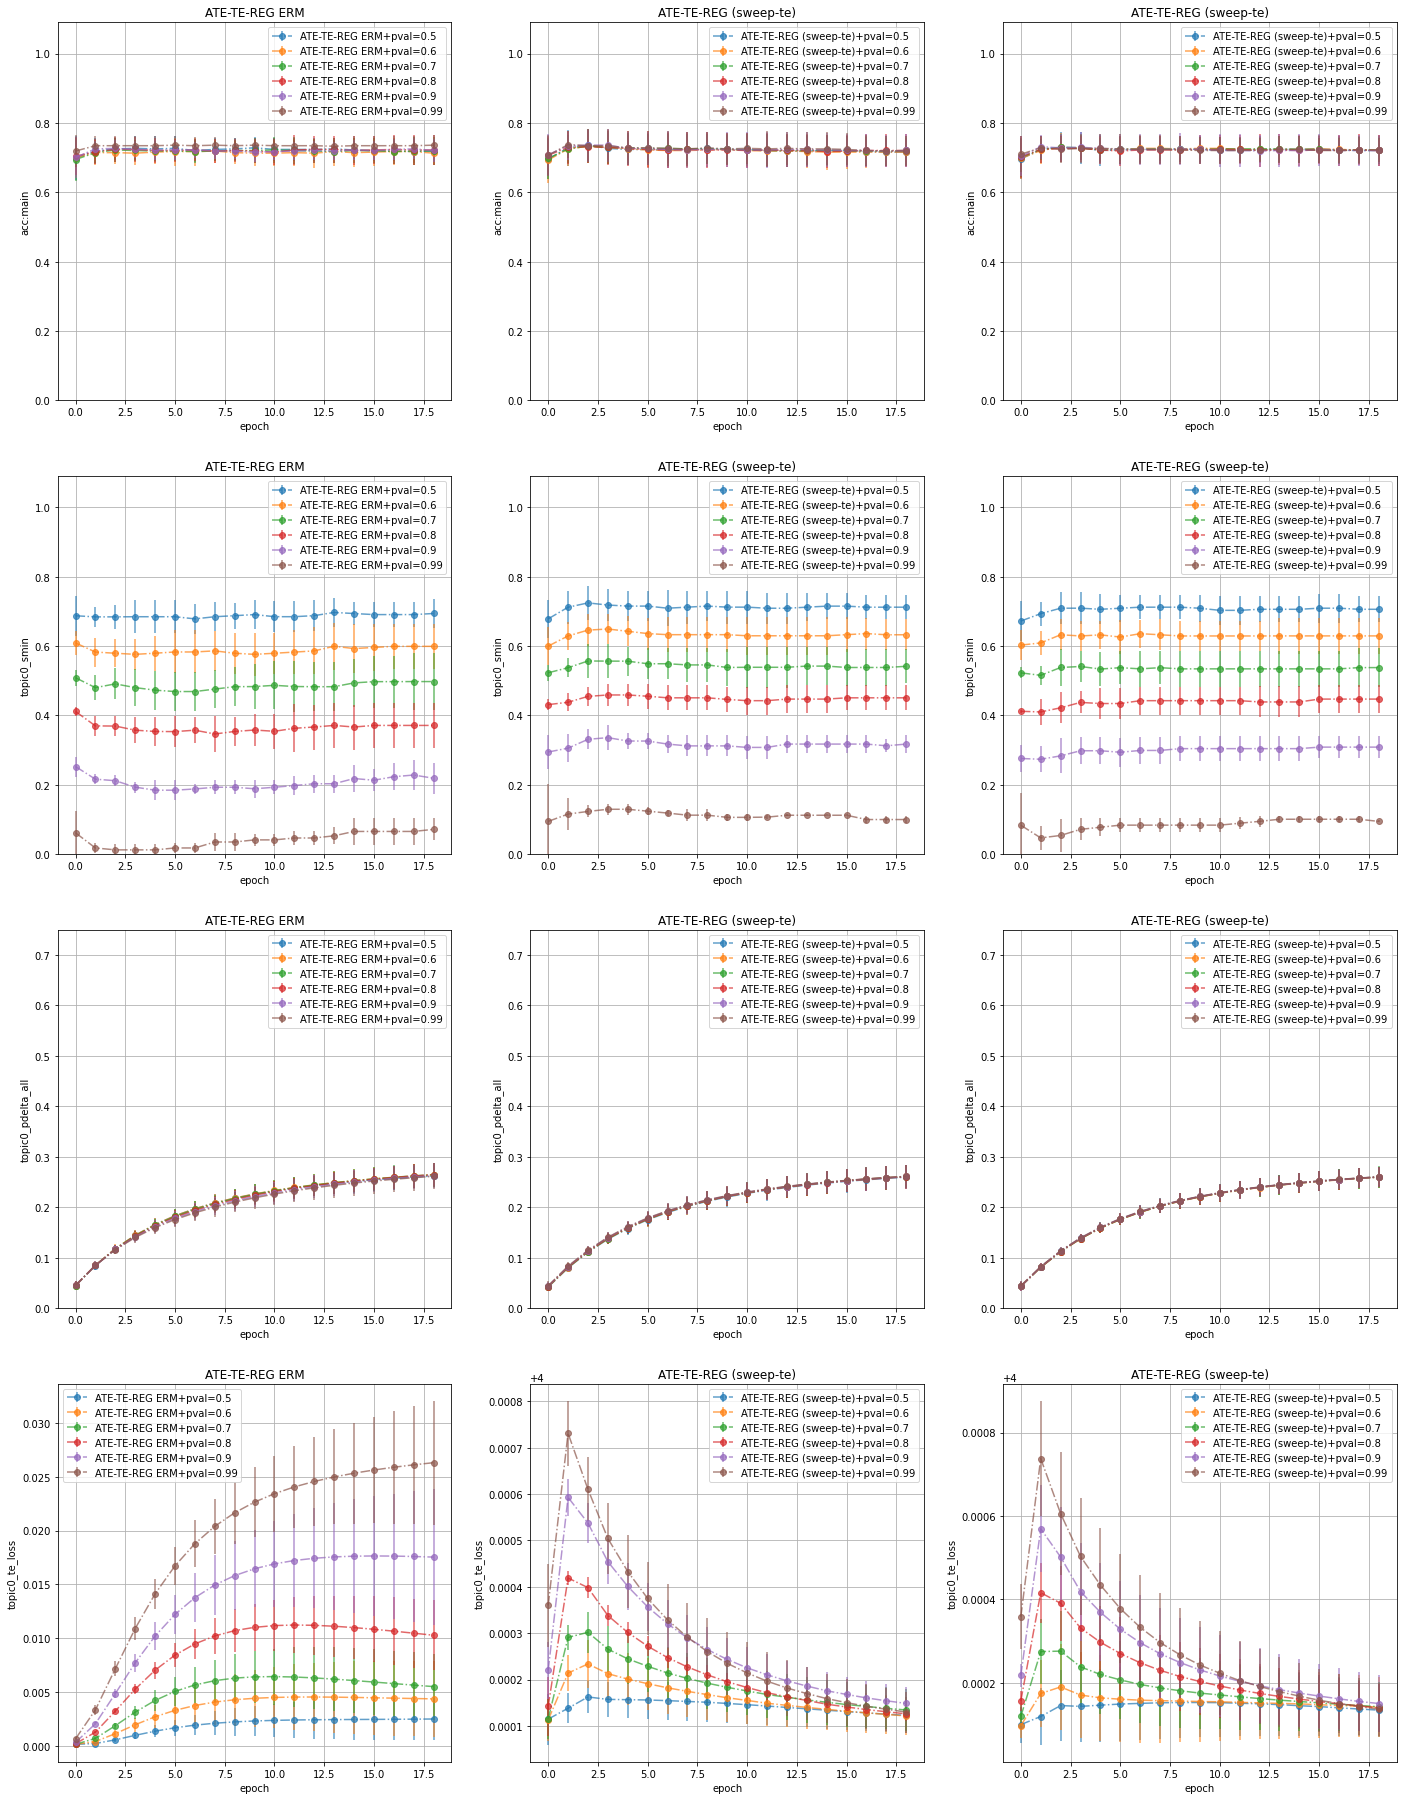

Bad pipe message: %s [b'\x88\xe7$\x9cz\xed\xac\x8b\xf4\xecxV\xe5,qJ\xb4O \x9d\xcb\xcd\xf4_\xbe\x0e\x16\x15w\xe7F\x08\xc5\xd8\xd4!7\x1b\x18\xde]\xef\x14\x05\xad\xd47#+\x042\x00\x08\x13\x02\x13\x03', b'\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127', b'.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00']
Bad pipe message: %s [b'\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b"\xa9\xdb<@\xebE\x80\x1e\xc21\xd8CF\x84*\xe6a\xbd\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0"]
Bad pipe message: %s [b'\x14\x009\x008\xc0\t\xc0\x13']
Bad pipe message: %s [b"{}\xb7K\\\xf0\x0cZ\x16\x17\x15\xf8\xf1\x1fdT(\xb9\x00

In [25]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
# ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
# ate_list_de_loss = [-0.017,0.07,0.09,0.21,0.3,0.26] #(0.7,0.12 miss)
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

# #alpha and gval selection using the gval accuracy
# ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
# ate_list_sel_dr_acc = [0.01,0.1,0.15,0.26,0.04,0.31] #(0.7,0.16 miss)


# #alpha and gval section using the loss
# ate_list_sel_de_loss = [-0.0002,0.001,0.0006,0.01,0.06,0.11] #(full slot missing)
# ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]

num_cols = 3

topic_name="spurious"
sample=1000


telambda = 10 # 0 10 100
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
            "topic0_te_loss",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"


plt.rcParams['figure.figsize'] = [8*num_cols, 8*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),num_cols)

# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=0,
#                          title="ERM",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_true,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=1,
#                          title="ATE-TE-REG True",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=2,
#                          title="ATE-TE-REG DE-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DE-Loss",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DR-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=5,
#                          title="ATE-TE-REG DR-Loss",
# )



#Plotting the ERM (using the telambda=0)
dummy_ate_val = [0.0]*len(pval_list) #since we use telambda =0 these ate doesnt matter
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=dummy_ate_val,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,
                             
                         ),
                         tidx=0,
                         title="ATE-TE-REG ERM",
)

#Plotting the regularized timeline
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[-2.0]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG (sweep-te)",
)

#Plotting the regularized timeline
plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[2.0]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=2,
                         title="ATE-TE-REG (sweep-te)",
)


## Sweep on the te ate value

## comparing telambda strength

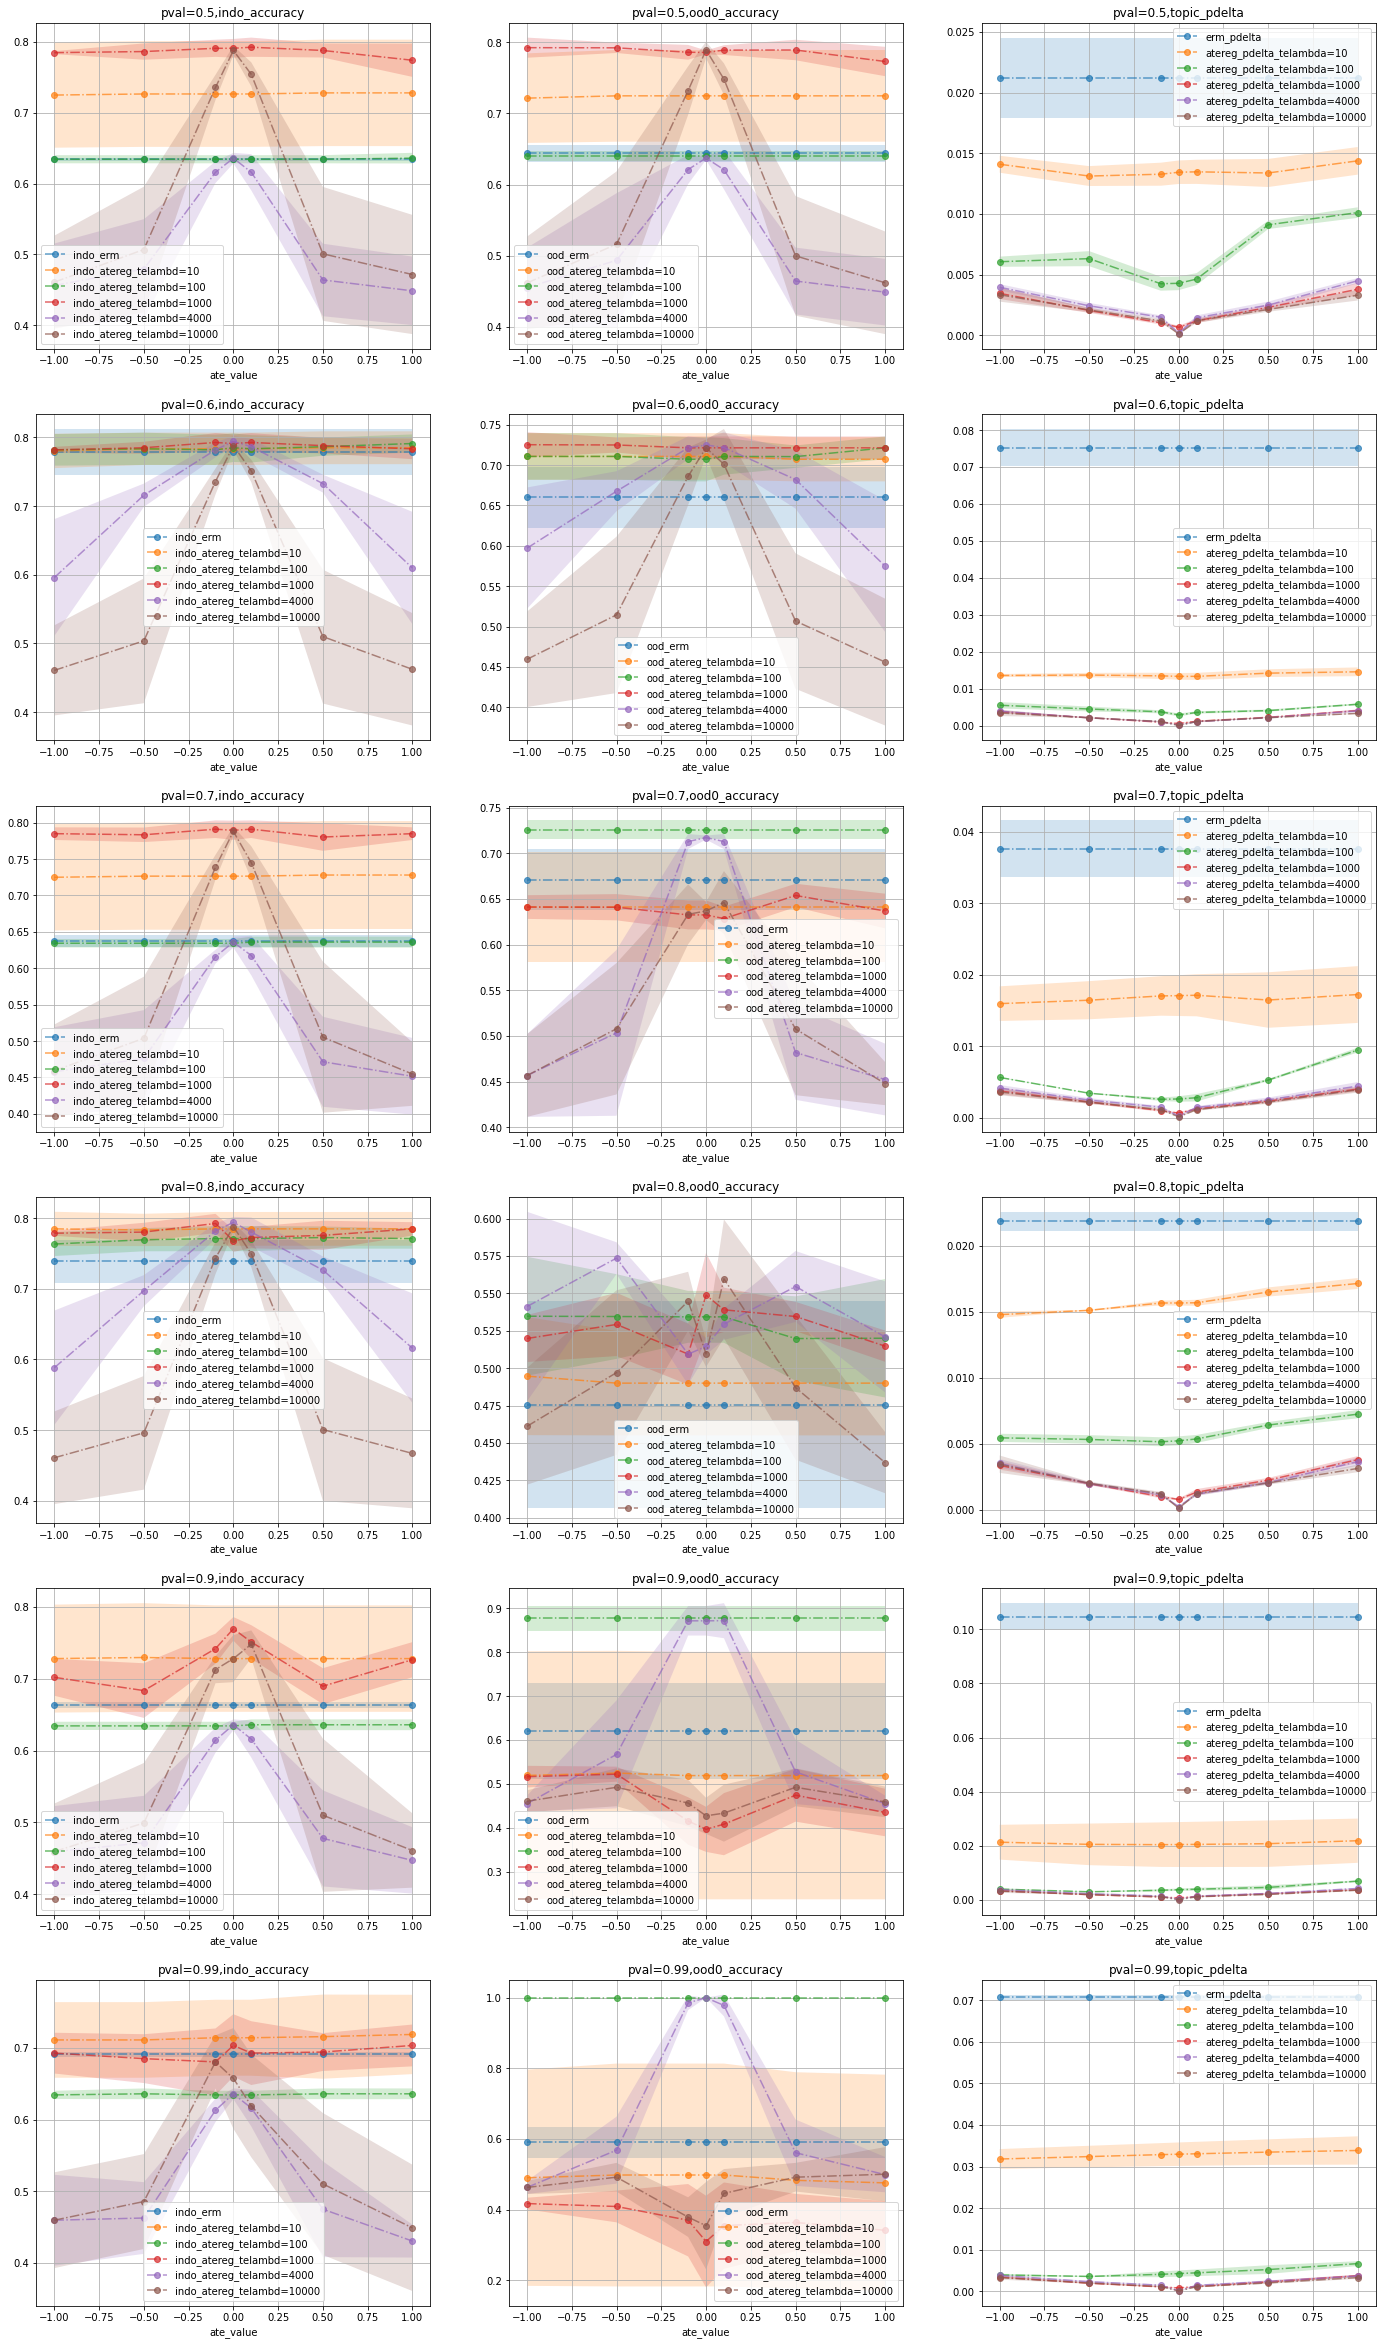

In [32]:
run_list=[13,14,15] #[10,11,12]:with initial CPD   [13,14,15]:with changed CPD
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#This will be true effect
ate_list_de_acc = [0.01,0.04,0.04,0.07,0.1,0.1]
ate_list_de_loss = [0.04,0.06,0.06,0.09,0.12,0.15]
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.06,-0.01,-0.01,0,-0.06,0]
ate_list_sel_dr_acc = [0.09,0.1,0.14,0.18,0.08,0]


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



# ate_sweep_list = [-20.0, -10.0, -5.0, -1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0, 5.0,  10.0, 20.0]
ate_sweep_list = [-1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0,]
# ate_sweep_list = [-1.0, -0.7, -0.5, -0.3, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 1.0,]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="spurious"
sample=1000
num_topics=1


telambda_list = [10,100,1000,4000,10000] #0, 10, 100
noise=0.0

reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )

#We have used te_lambda=0 for this experiment though!
dummy_ate_val = 0.0
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[dummy_ate_val,]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,#telambda

                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                         plot_item_list=None,
                                                         run_list=run_list,
                                                         pval_list=pval_list,
                                                         ate_list=[ate_val,]*len(pval_list),
                                                         fname_pattern=reg_fname_pattern.format(
                                                                             "{1}",
                                                                             topic_name,
                                                                             sample,
                                                                             noise,
                                                                             "{0}",
                                                                             "{2}",
                                                                             telambda,

                                                         ),
                                                         tidx=None,
                                                         title=None,
                                                         no_plot_mode=True,
                                                         print_best_result=False,
        )

plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=None,
)

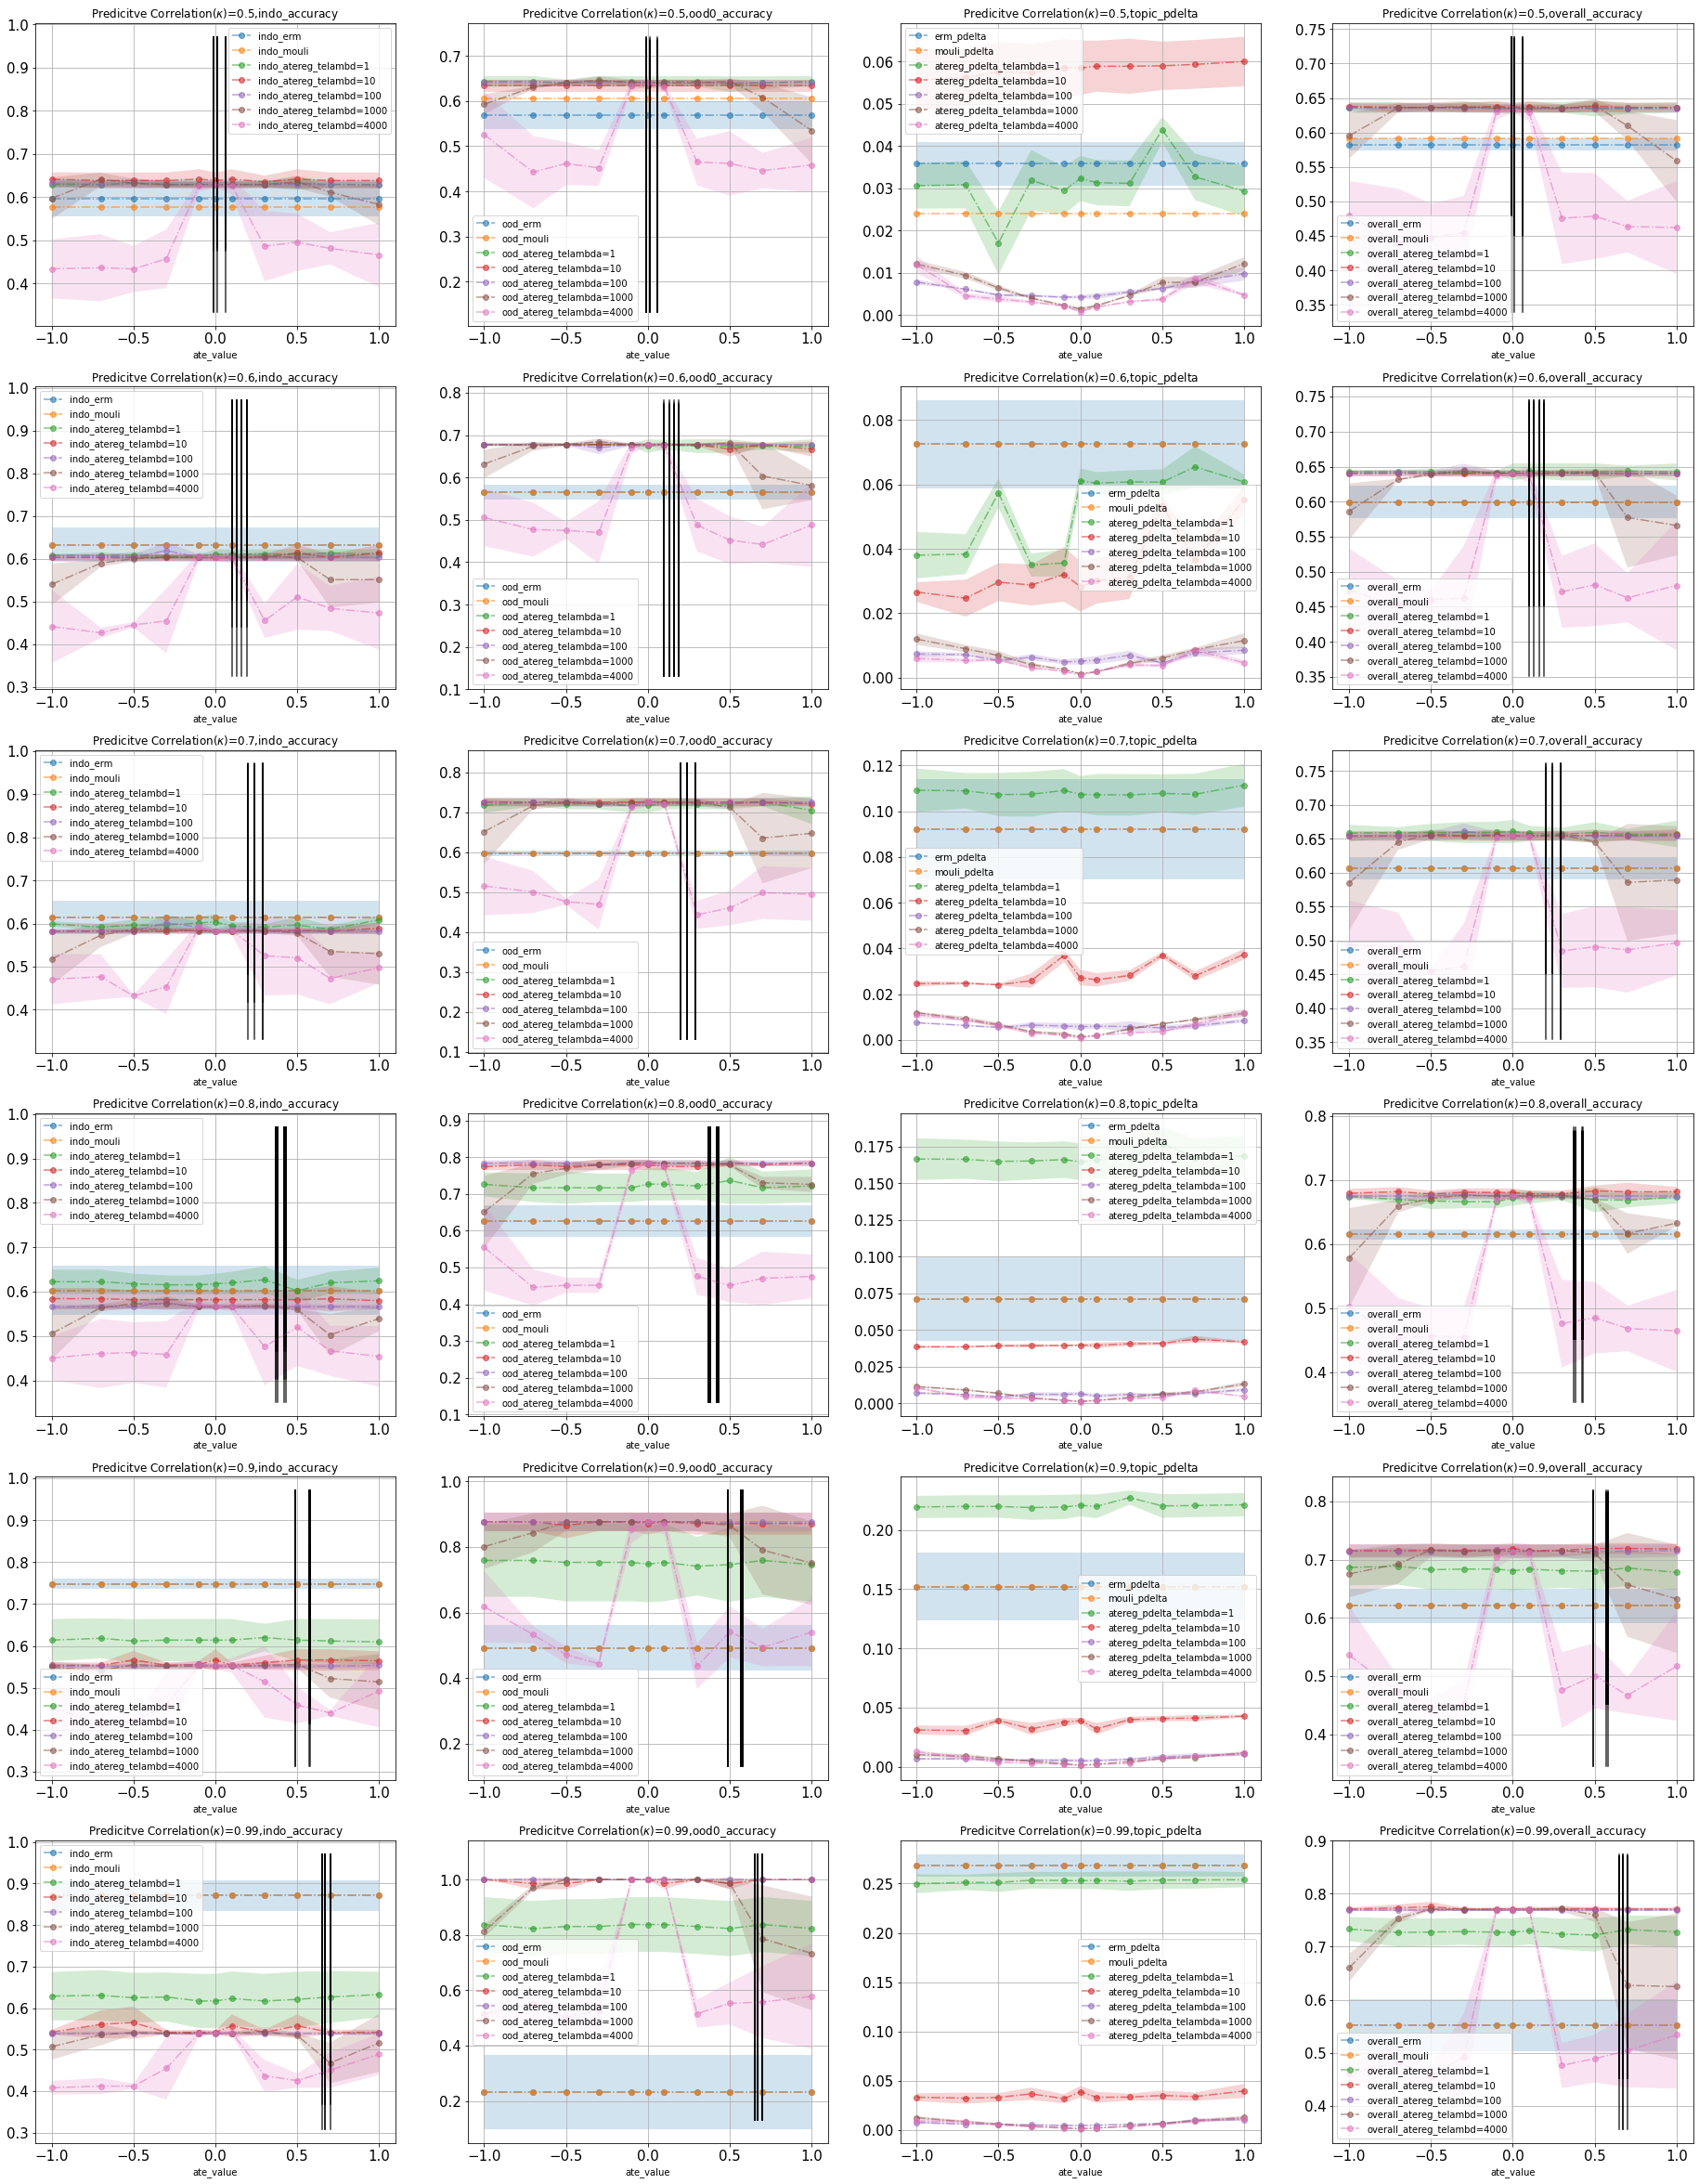

In [39]:
run_list=[13,14,15] #[10,11,12]:with initial CPD   [13,14,15]:with changed CPD
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#This will be true effect
ate_list_de_acc = [-0.01,0.1,0.2,0.38,0.49,0.65]
ate_list_de_loss = [-0.01,0.13,0.24,0.37,0.49,0.67]
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.01,0.16,0.29,0.43,0.57,0.67]
# ate_list_sel_dr_acc = [0.09,0.1,0.14,0.18,0.08,0]


#alpha and gval section using the loss
ate_list_sel_de_loss = [0.06,0.19,0.29,0.42,0.58,0.7]
# ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]




ate_sweep_list = [-1.0, -0.7, -0.5, -0.3, -0.1, 0.0, 0.1, 0.3, 0.5,  0.7, 1.0,]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
#     ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="spurious"
sample=1000
num_topics=1


telambda_list = [1,10,100,1000,4000,] #0, 10, 100
noise=0.0
#dcf was not there in the fname so got overwritten with 1.0 dcf run for OURS stage2
dcf=1.0



reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({}).dcf({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"
mouli_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.moulis1toy3.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).dcf({}).mvsel({})/"






#Mouli: Getting the best result for the erm runs
mouli_run_list = [0,1,2]
mouli_mvsel="loss" #the metric used for selection criteria
#For every pval there will be different model
selected_inv_model = {0.5:"spurious",0.6:"erm",0.7:"erm",0.8:"erm",0.9:"erm",0.99:"erm"}
#Getting the relevant files for each of the pval
mouli_all_pval_best_result = {}
dummy_ate_val = 0.0
for pval in pval_list:
    #GEtting the fname correct
    if selected_inv_model[pval]=="erm":
        mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
    else:
        mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_({})_cad.json".format(selected_inv_model[pval])
    
    mouli_pval_list=[pval]
    mouli_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=mouli_pval_list,
                                 ate_list=[dummy_ate_val,]*len(mouli_pval_list),
                                 fname_pattern=mouli_pval_fname.format(
                                                     "{1}",
                                                     "all",
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     dcf,
                                                     mouli_mvsel,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )
    #Saving to the central location!
    mouli_all_pval_best_result[pval]=mouli_pval_best_result[pval]
    


    
    
#ERM : We have used te_lambda=0 for this experiment though!
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=[dummy_ate_val,]*len(pval_list),
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              0,#telambda

#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )
#Instead of 0 telmabda run lets use the ERM created using Mouli's run. Why not
mouli_pval_erm_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
erm_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=pval_list,
                                 ate_list=[dummy_ate_val,]*len(pval_list),
                                 fname_pattern=mouli_pval_erm_fname.format(
                                                     "{1}",
                                                     "all",
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     dcf,
                                                     mouli_mvsel,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )

#OURS (taylor swift!): Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                         plot_item_list=None,
                                                         run_list=run_list,
                                                         pval_list=pval_list,
                                                         ate_list=[ate_val,]*len(pval_list),
                                                         fname_pattern=reg_fname_pattern.format(
                                                                             "{1}",
                                                                             topic_name,
                                                                             sample,
                                                                             noise,
                                                                             "{0}",
                                                                             "{2}",
                                                                             telambda,
                                                                             dcf,

                                                         ),
                                                         tidx=None,
                                                         title=None,
                                                         no_plot_mode=True,
                                                         print_best_result=False,
        )

        
        
        
plot_ateval_performance_spectrum_overall(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 savename="p2_corr_syntext_n{}_s{}_dcf{}".format(noise,sample,dcf)
)
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 savename="p2_corr_syntext_n{}_s{}_dcf{}".format(noise,sample,dcf)
)

## with hinge width in the same strong reg

In [29]:
run_list=[10,11]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
ate_list_de_loss = [-0.017,0.07,0.12,0.21,0.3,0.26]
ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.16,0.26,0.04,0.31]


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



# ate_sweep_list = [-20.0, -10.0, -5.0, -1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0, 5.0,  10.0, 20.0]
ate_sweep_list = [-1.0,-0.7,-0.5,-0.3,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="spurious"
sample=1000
num_topics=1


telambda = 10 #0, 10, 100
noise=0.0
hwidth = 0.1 #0.05 0.1 0.2 0.5 1.0
reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )

#We have used te_lambda=0 for this experiment though!
dummy_ate_val = 0.0
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[dummy_ate_val,]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,#telambda

                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
atereg_pval_best_result={}
for ate_val in ate_sweep_list:
    atereg_pval_best_result[ate_val] = plot_one_result_timeline(ax=None,
                                                     plot_item_list=None,
                                                     run_list=run_list,
                                                     pval_list=pval_list,
                                                     ate_list=[ate_val,]*len(pval_list),
                                                     fname_pattern=reg_hwidth_fname_pattern.format(
                                                                         "{1}",
                                                                         topic_name,
                                                                         sample,
                                                                         noise,
                                                                         "{0}",
                                                                         "{2}",
                                                                         telambda,
                                                                         hwidth,

                                                     ),
                                                     tidx=None,
                                                     title=None,
                                                     no_plot_mode=True,
                                                     print_best_result=False,
    )


num_cols = num_topics*2+1 #assuming trained combined so only one indo
plt.rcParams['figure.figsize'] = [8*num_cols, 7*len(pval_list)]
fig,ax = plt.subplots(len(pval_list),num_cols)
#Plotting each of the variation for the pval
for pidx,pval in enumerate(pval_list):
    #Plotting the indo for the erm
    erm_best_indo = np.array([erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list))
    erm_best_indo_std = np.array([erm_pval_best_result[pval]["indo_std"]]*len(ate_sweep_list))
    ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_erm")
    ax[pidx,0].fill_between(ate_sweep_list,erm_best_indo-erm_best_indo_std,erm_best_indo+erm_best_indo_std,alpha=0.2)
    
    #Creating the varation of best indo and ood acc for each of the ate val
    atereg_best_indo = np.array([atereg_pval_best_result[ate_val][pval]["indo"] for ate_val in ate_sweep_list])
    atereg_best_indo_std = np.array([atereg_pval_best_result[ate_val][pval]["indo_std"] for ate_val in ate_sweep_list])
    ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_atereg")
    ax[pidx,0].fill_between(ate_sweep_list,atereg_best_indo-atereg_best_indo_std,atereg_best_indo+atereg_best_indo_std,alpha=0.2)
    
    ax[pidx,0].set_title("pval={},indo_accuracy".format(pval))
    ax[pidx,0].set_xlabel("ate_value")
    ax[pidx,0].legend()
    ax[pidx,0].grid(True)
#     ax[pidx,0].set_ylim(0.5,0.9)
    
    #Adding the pdelta curves
    for tidx in range(0,num_cols-1,2):
        #Plotting the ondo for the erm
        erm_best_ood = np.array([erm_pval_best_result[pval]["ood{}".format((tidx)//2)]]*len(ate_sweep_list))
        erm_best_ood_std = np.array([erm_pval_best_result[pval]["ood{}_std".format((tidx)//2)]]*len(ate_sweep_list))
        ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_erm")
        ax[pidx,tidx+1].fill_between(ate_sweep_list,erm_best_ood-erm_best_ood_std,erm_best_ood+erm_best_ood_std,alpha=0.2)

        #Creating the varation of best indo and ood acc for each of the ate val
        atereg_best_ood = np.array([atereg_pval_best_result[ate_val][pval]["ood{}".format((tidx)//2)] for ate_val in ate_sweep_list])
        atereg_best_ood_std = np.array([atereg_pval_best_result[ate_val][pval]["ood{}_std".format((tidx)//2)] for ate_val in ate_sweep_list])
        ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_atereg")
        ax[pidx,tidx+1].fill_between(ate_sweep_list,atereg_best_ood-atereg_best_ood_std,atereg_best_ood+atereg_best_ood_std,alpha=0.2)
               
        
        yllim=0.0
        yulim=1.01
        
        #Marking the location of diffrent ate estimates
#         for ate_name, ate_list in ate_list_dict.items():
#             yval_line = np.arange(yllim,yulim,0.1)
#             xval_mark = [ate_list[pidx]]*yval_line.shape[0]
            
#             #Marking the ate as the vertical line
#             ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
#             ax[pidx,0].plot(xval_mark,yval_line,ls="-.",label=ate_name)
    
        ax[pidx,tidx+1].set_title("pval={},ood{}_accuracy".format(pval,(tidx)//2))
        ax[pidx,tidx+1].set_xlabel("ate_value")
        ax[pidx,tidx+1].legend()
        ax[pidx,tidx+1].grid(True)
#         ax[pidx,tidx+1].set_ylim(yllim,yulim)

        #Addign thhe plot for pdelta
        topic_pdelta_atevar = np.array([atereg_pval_best_result[ate_val][pval]["topic{}_pdelta_all".format(tidx//2)] for ate_val in ate_sweep_list])
        topic_pdelta_atevar_std = np.array([atereg_pval_best_result[ate_val][pval]["topic{}_pdelta_all_std".format(tidx//2)] for ate_val in ate_sweep_list])
        ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_atevar-topic_pdelta_atevar_std,topic_pdelta_atevar+topic_pdelta_atevar_std,alpha=0.2)
        
        ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_atevar,ls="-.",marker="o",alpha=0.7,label="ate_pdelta")
        ax[pidx,tidx+2].set_title("pval={},topic_pdelta".format(pval,(tidx)//2))
        ax[pidx,tidx+2].set_xlabel("ate_value")
        ax[pidx,tidx+2].legend()
        ax[pidx,tidx+2].grid(True)
    
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/nlp_toy3/nlp_logs/cad.civils2.rnum(11).topic(spurious).sample(1000).noise(0.0).pvaltsp(0.5).t0_ate(-1.0).telambda(10).hwidth(0.1)/probe_metric_list.json'

# MNIST34

## Strong regularization

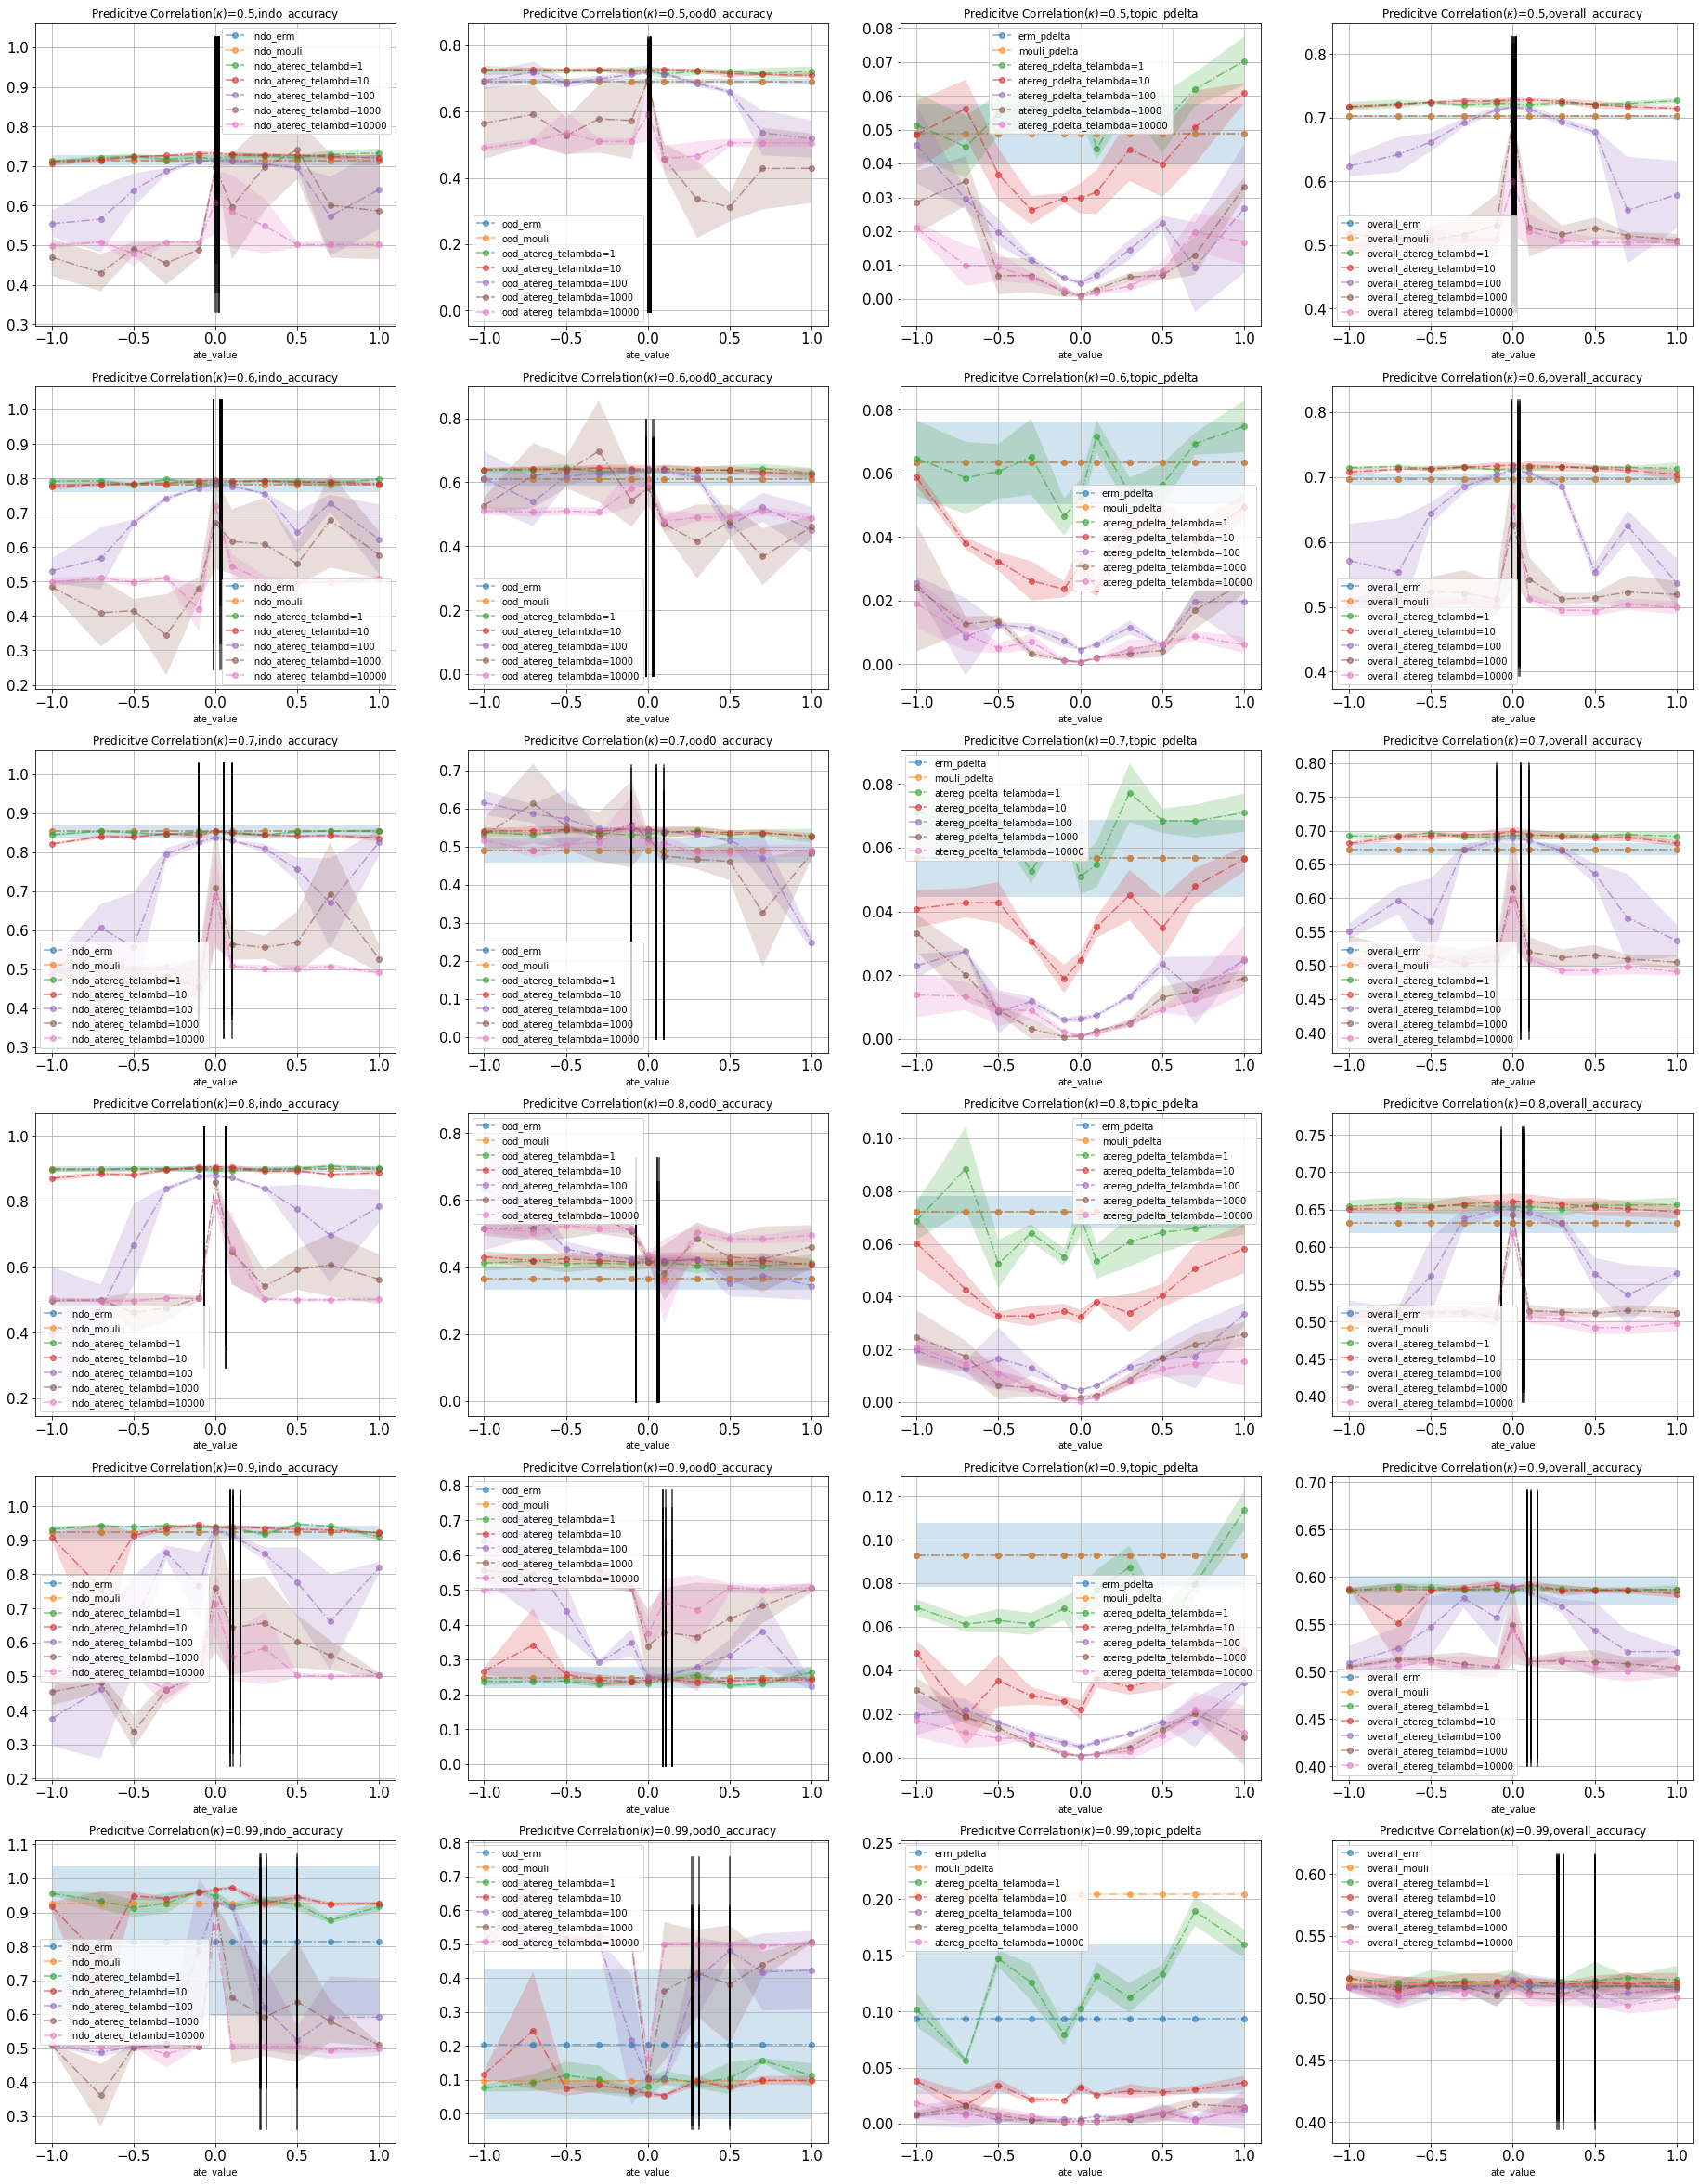

In [42]:
run_list=[0,1,2] #[10,11,12]:with initial CPD   [13,14,15]:with changed CPD
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#This will be true effect
ate_list_de_acc = [0.02,0.04,0.05,0.07,0.11,0.28]
ate_list_de_loss = [0.02,0.03,0.05,0.06,0.15,0.27]
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.01,-0.01,-0.1,-0.07,0.09,0.5]
ate_list_sel_de_loss = [0,-0.01,0.1,0.06,0.09,0.31]


#alpha and gval section using the loss
# ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
# ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



ate_sweep_list = [-1.0, -0.7, -0.5, -0.3, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 1.0,]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="rotation"
sample=10000
num_topics=1


telambda_list = [1,10,100,1000,10000] #0, 10, 100
noise=0.3
hwidth=0.0
dcf=0.0
mouli_mvsel="loss"

reg_fname_pattern="dataset/mnist/nlp_logs/cad.mnists2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/mnist/nlp_logs/cad.mnists2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"
mouli_fname_pattern="dataset/mnist/nlp_logs/cad.moulis1mnist.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).dcf({}).mvsel({})/"






#Mouli: Getting the best result for the erm runs
mouli_run_list = [0,1,2]
mouli_mvsel="loss" #the metric used for selection criteria
#For every pval there will be different model
selected_inv_model = {0.5:"erm",0.6:"erm",0.7:"erm",0.8:"erm",0.9:"erm",0.99:"color"}
#Getting the relevant files for each of the pval
mouli_all_pval_best_result = {}
for pval in pval_list:
    #GEtting the fname correct
    if selected_inv_model[pval]=="erm":
        mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
    else:
        mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_({})_cad.json".format(selected_inv_model[pval])
    
    mouli_pval_list=[pval]
    mouli_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=mouli_pval_list,
                                 ate_list=[dummy_ate_val,]*len(mouli_pval_list),
                                 fname_pattern=mouli_pval_fname.format(
                                                     "{1}",
                                                     "all",
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     dcf,
                                                     mouli_mvsel,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )
    #Saving to the central location!
    mouli_all_pval_best_result[pval]=mouli_pval_best_result[pval]
    


    
    
#ERM : We have used te_lambda=0 for this experiment though!
# dummy_ate_val = 0.0
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=[dummy_ate_val,]*len(pval_list),
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              0,#telambda

#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )
#Instead of 0 telmabda run lets use the ERM created using Mouli's run. Why not
mouli_pval_erm_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
erm_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=pval_list,
                                 ate_list=[dummy_ate_val,]*len(pval_list),
                                 fname_pattern=mouli_pval_erm_fname.format(
                                                     "{1}",
                                                     "all",
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     dcf,
                                                     mouli_mvsel,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )

#OURS (taylor swift!): Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                         plot_item_list=None,
                                                         run_list=run_list,
                                                         pval_list=pval_list,
                                                         ate_list=[ate_val,]*len(pval_list),
                                                         fname_pattern=reg_fname_pattern.format(
                                                                             "{1}",
                                                                             topic_name,
                                                                             sample,
                                                                             noise,
                                                                             "{0}",
                                                                             "{2}",
                                                                             telambda,
                                                                             hwidth,

                                                         ),
                                                         tidx=None,
                                                         title=None,
                                                         no_plot_mode=True,
                                                         print_best_result=False,
        )

        
plot_ateval_performance_spectrum_overall(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 savename="p2_corr_mnist_n{}_s{}".format(noise,sample)
                                 
)
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 savename="p2_corr_mnist_n{}_s{}".format(noise,sample)
                                 
)

# CEBAB

## Strategy 2: Ranking experiment (match with absolute TE)

# CivilComments Dataset

## Sweep on the ate effect

### Race

In [53]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.01,0.01,0.03,0.05,0.07,0.13]
ate_list_de_loss = [0.01,0.01,0.03,0.05,0.09,0.12]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.07,0.01,0,0.05,0.12,0.1]
ate_list_sel_dr_acc = [0.0,0.01,0.09,0.1,0.13,0.15]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.1,0.0,0.1,0.3,0.5,0.7,0.9,1.0]
# ate_sweep_list =  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=5000
num_topics=1


telambda_list = [1,100,1000,10000]
noise=0.0

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({})/"
#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )



#Mouli: Getting the best result for the erm runs
mouli_run_list = [0,1,2]
mouli_mvsel="loss" #the metric used for selection criteria
#For every pval there will be different model
selected_inv_model = {0.5:"race",0.6:"race",0.7:"race",0.8:"race",0.9:"race",0.99:"race"}
#Getting the relevant files for each of the pval
mouli_all_pval_best_result = {}
for pval in pval_list:
    #GEtting the fname correct
    if selected_inv_model[pval]=="erm":
        mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
    else:
        mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_({})_cad.json".format(selected_inv_model[pval])
    
    mouli_pval_list=[pval]
    mouli_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=mouli_pval_list,
                                 ate_list=[dummy_ate_val,]*len(mouli_pval_list),
                                 fname_pattern=mouli_pval_fname.format(
                                                     "{1}",
                                                     topic_name,
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     mouli_mvsel,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )
    #Saving to the central location!
    mouli_all_pval_best_result[pval]=mouli_pval_best_result[pval]
    


    
    
#ERM : We have used te_lambda=0 for this experiment though!
# dummy_ate_val = 0.0
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=[dummy_ate_val,]*len(pval_list),
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              0,#telambda

#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )
#Instead of 0 telmabda run lets use the ERM created using Mouli's run. Why not
mouli_pval_erm_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
erm_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=pval_list,
                                 ate_list=[dummy_ate_val,]*len(pval_list),
                                 fname_pattern=mouli_pval_erm_fname.format(
                                                     "{1}",
                                                     topic_name,
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     mouli_mvsel,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )



#OURS (taylor swift!): Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        if telambda>5: #we have new parameter hinge wigth so name changes!
            atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 0.0,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )

        
plot_ateval_performance_spectrum_overall(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=True,
                                 savename="p2_civil_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=True,
                                 savename="p2_civil_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

## Weaker regularization with width

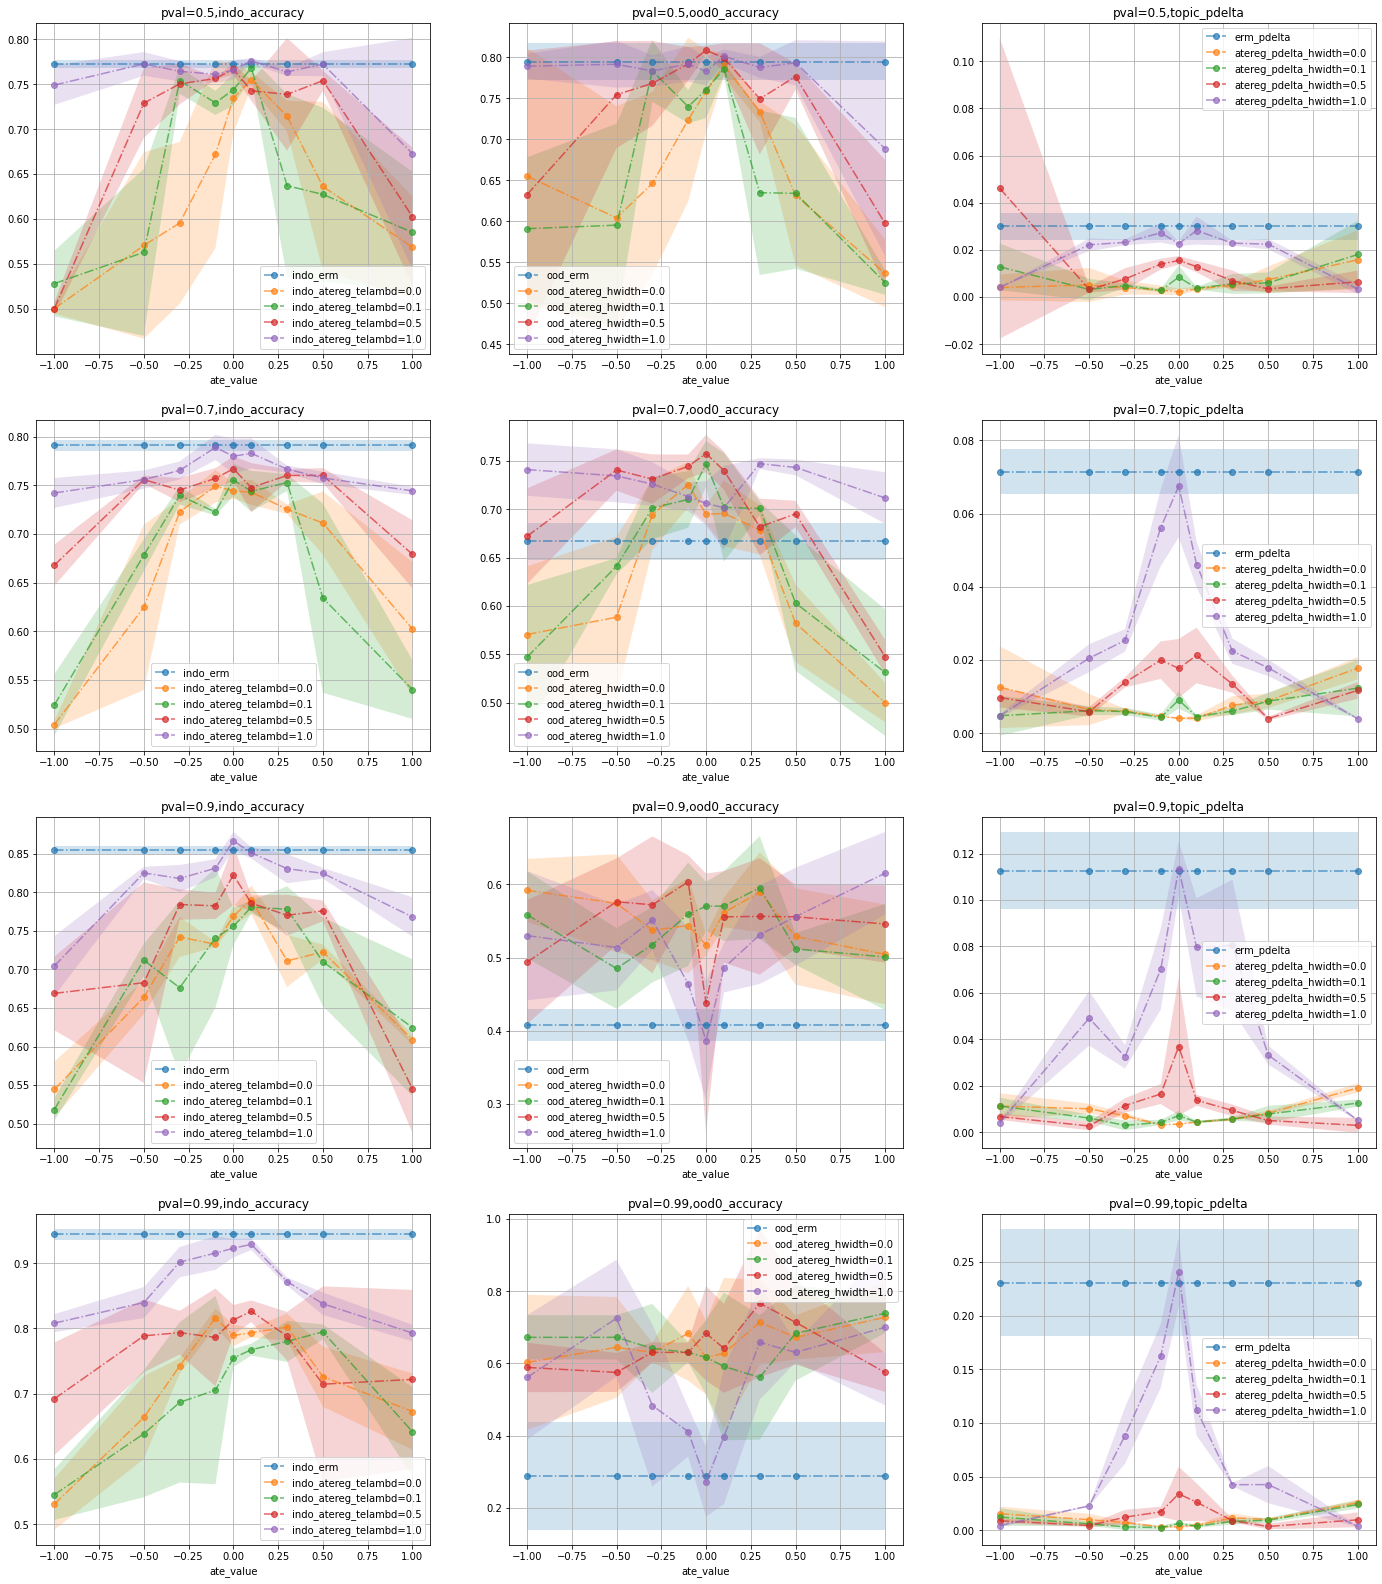

In [75]:
run_list=[0,1,2]
pval_list=[0.5,0.7,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = []
ate_list_de_loss = []
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = []
ate_list_sel_dr_acc = []


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list =  [-1.0,-0.5,-0.3,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=5000
num_topics=1


telambda_list = [1,10,100,1000]
telambda=1000
noise=0.0
hwidth=0.1 #0.1 0.5 1.0
hwidth_list = [0.0,0.1,0.5,1.0]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)



#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for hwidth in hwidth_list:
    for ate_val in ate_sweep_list:
        if hwidth==0.0 and telambda<5:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 hwidth,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )


            
            
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 hpname="hwidth",
)

### Gender

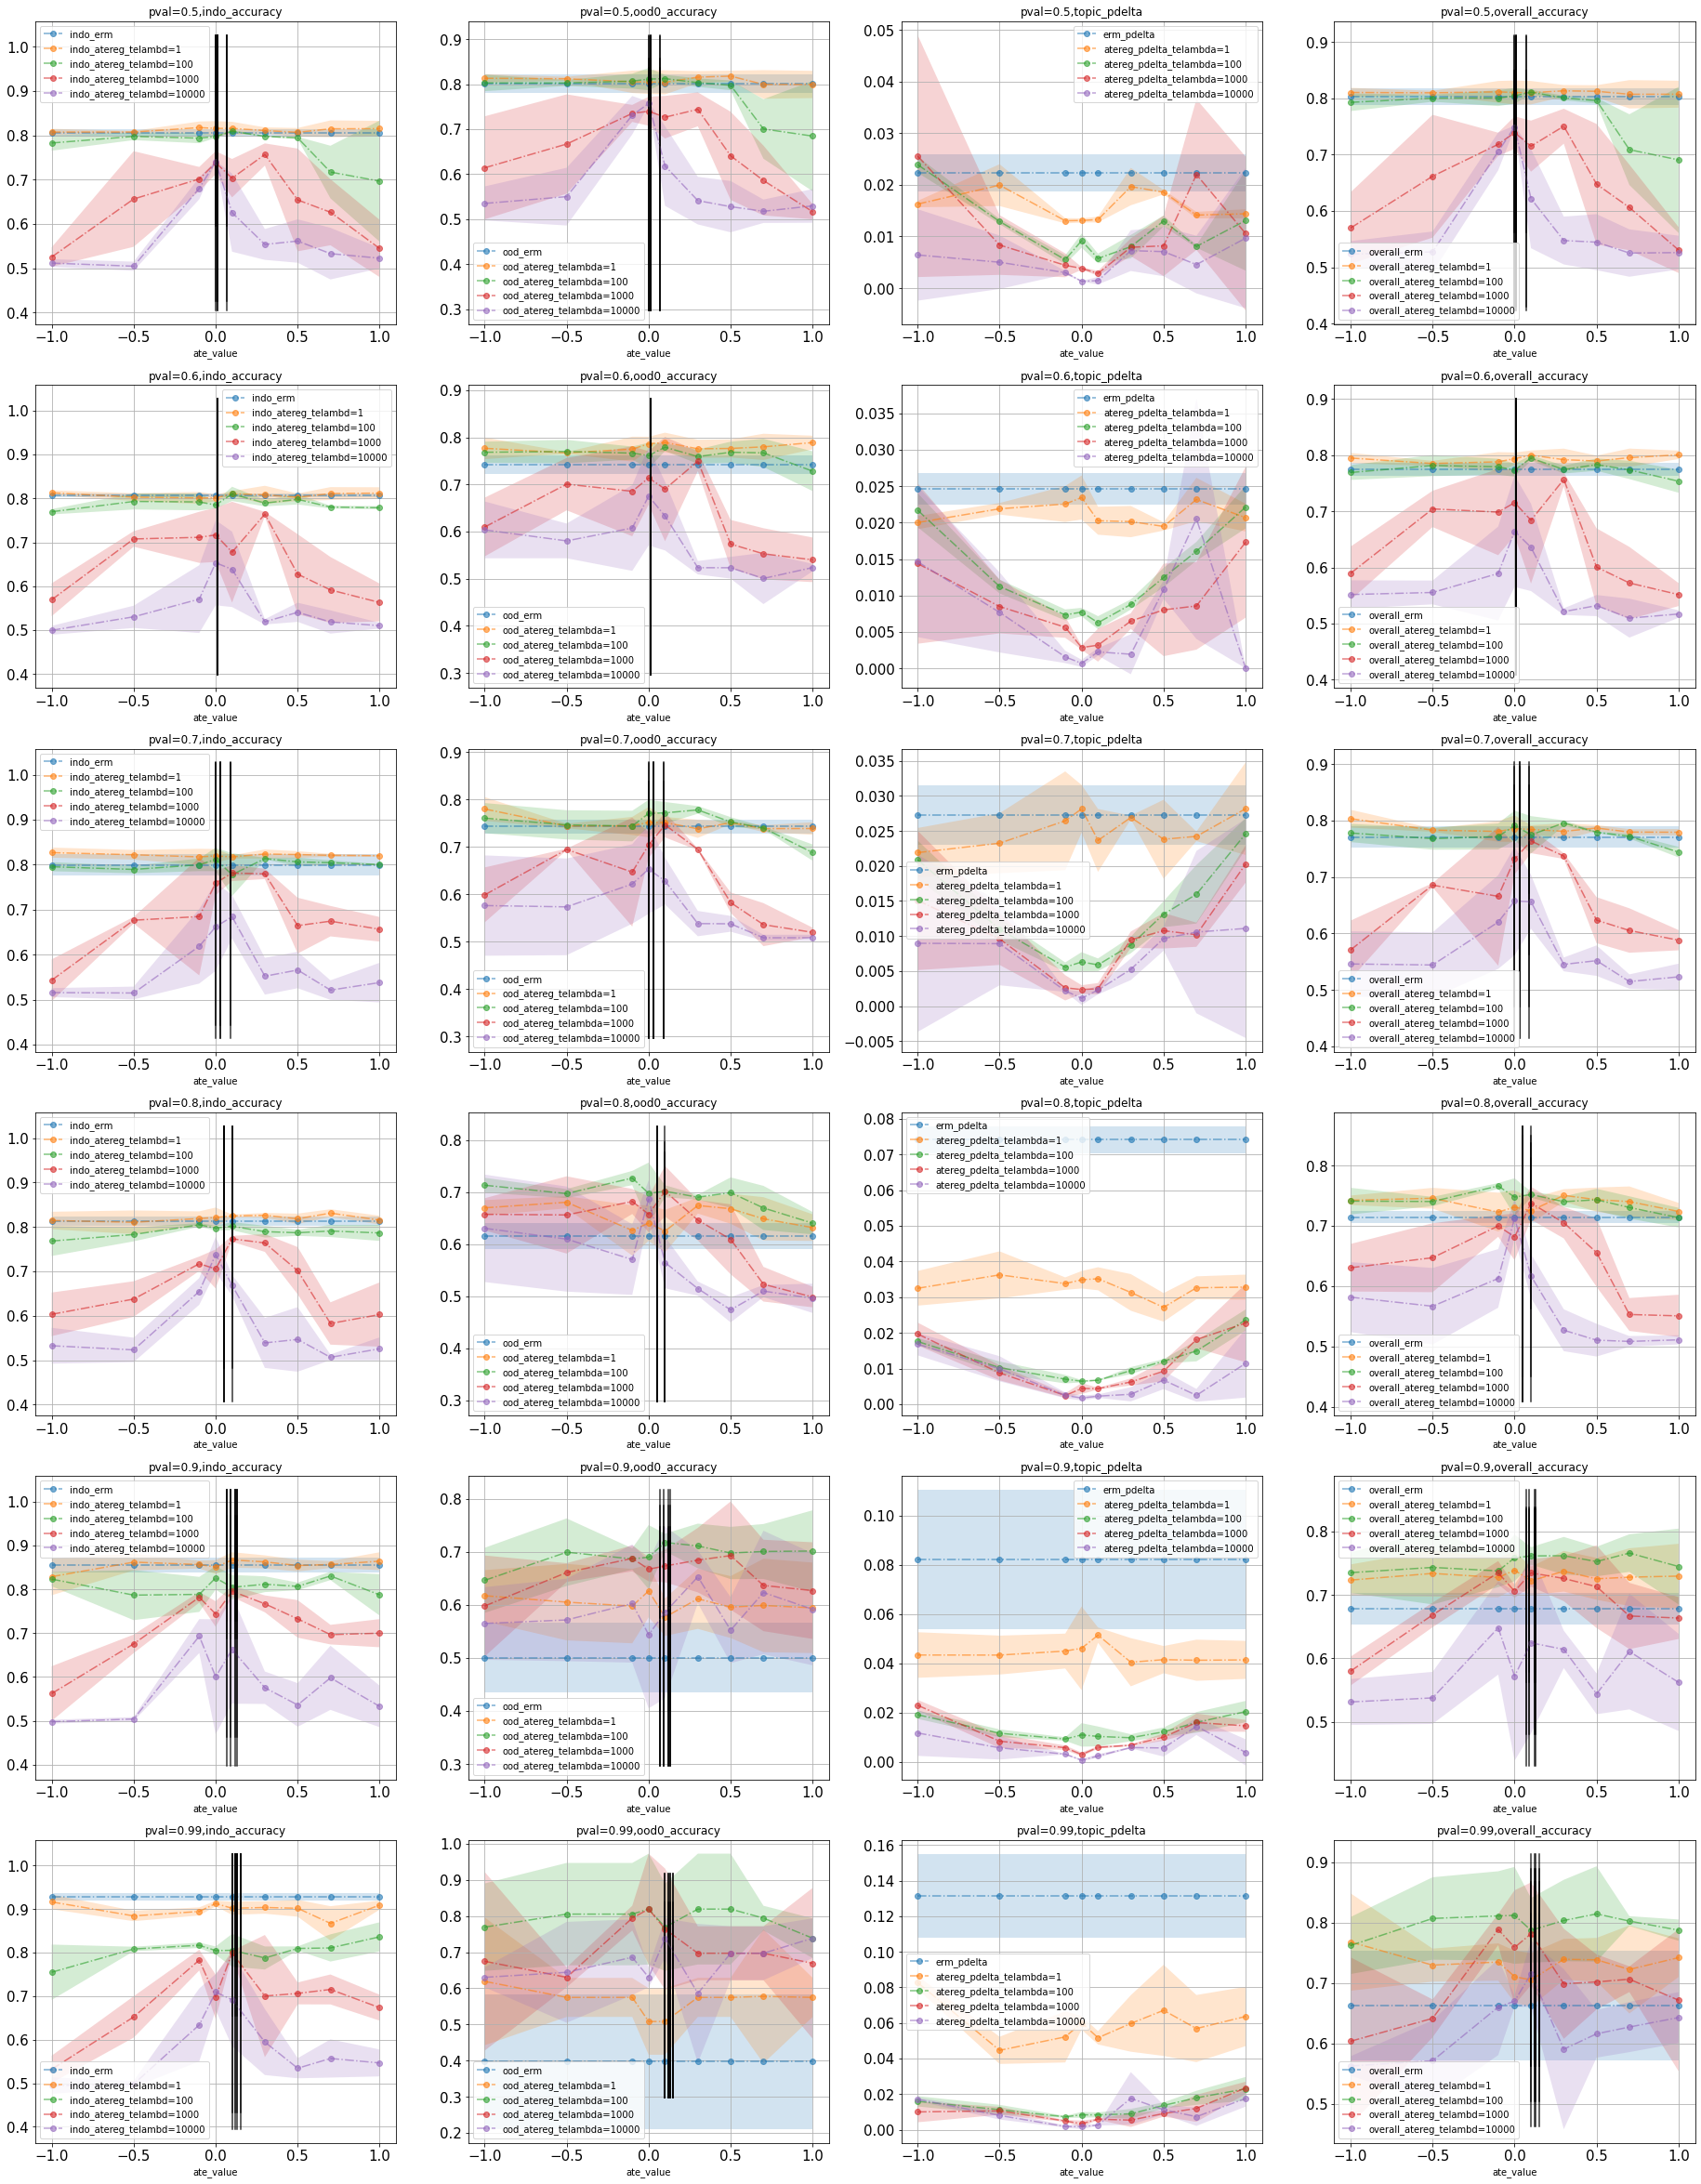

In [66]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.01,0.01,0.03,0.05,0.07,0.13]
ate_list_de_loss = [0.01,0.01,0.03,0.05,0.09,0.12]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.07,0.01,0,0.05,0.12,0.1]
ate_list_sel_dr_acc = [0.0,0.01,0.09,0.1,0.13,0.15]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.1,0.0,0.1,0.3,0.5,0.7,1.0] #we also have 0.9 availabel to us for telambda upto 10k
# ate_sweep_list =  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="gender"
sample=5000
num_topics=1


telambda_list = [1,100,1000,10000]
noise=0.0

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)


            
# #Mouli: Getting the best result for the erm runs
# mouli_run_list = [0,1,2]
# mouli_mvsel="loss" #the metric used for selection criteria
# #For every pval there will be different model
# selected_inv_model = {0.5:"erm",0.6:"erm",0.7:"erm",0.8:"erm",0.9:"erm",0.99:"color"}
# #Getting the relevant files for each of the pval
# mouli_all_pval_best_result = {}
# for pval in pval_list:
#     #GEtting the fname correct
#     if selected_inv_model[pval]=="erm":
#         mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
#     else:
#         mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_({})_cad.json".format(selected_inv_model[pval])
    
#     mouli_pval_list=[pval]
#     mouli_pval_best_result = plot_one_result_timeline(ax=None,
#                                  plot_item_list=None,
#                                  run_list=mouli_run_list,
#                                  pval_list=mouli_pval_list,
#                                  ate_list=[dummy_ate_val,]*len(mouli_pval_list),
#                                  fname_pattern=mouli_pval_fname.format(
#                                                      "{1}",
#                                                      "all",
#                                                      sample,
#                                                      noise,
#                                                      "{0}",
#                                                      dcf,
#                                                      mouli_mvsel,
#                                  ),
#                                  tidx=None,
#                                  title=None,
#                                  no_plot_mode=True,
#                                  print_best_result=False,
#     )
#     #Saving to the central location!
#     mouli_all_pval_best_result[pval]=mouli_pval_best_result[pval]
    


    
    
# #ERM : We have used te_lambda=0 for this experiment though!
# # dummy_ate_val = 0.0
# # erm_pval_best_result = plot_one_result_timeline(ax=None,
# #                          plot_item_list=None,
# #                          run_list=run_list,
# #                          pval_list=pval_list,
# #                          ate_list=[dummy_ate_val,]*len(pval_list),
# #                          fname_pattern=reg_fname_pattern.format(
# #                                              "{1}",
# #                                              topic_name,
# #                                              sample,
# #                                              noise,
# #                                              "{0}",
# #                                              "{2}",
# #                                              0,#telambda

# #                          ),
# #                          tidx=None,
# #                          title=None,
# #                          no_plot_mode=True,
# #                          print_best_result=False,
# # )
# #Instead of 0 telmabda run lets use the ERM created using Mouli's run. Why not
# mouli_pval_erm_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                                  plot_item_list=None,
#                                  run_list=mouli_run_list,
#                                  pval_list=pval_list,
#                                  ate_list=[dummy_ate_val,]*len(pval_list),
#                                  fname_pattern=mouli_pval_erm_fname.format(
#                                                      "{1}",
#                                                      "all",
#                                                      sample,
#                                                      noise,
#                                                      "{0}",
#                                                      dcf,
#                                                      mouli_mvsel,
#                                  ),
#                                  tidx=None,
#                                  title=None,
#                                  no_plot_mode=True,
#                                  print_best_result=False,
#     )


#OURS (taylor swift!): Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        if telambda>5: #we have new parameter hinge wigth so name changes!
            atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 0.0,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )

        
plot_ateval_performance_spectrum_overall(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=False,
                                 savename="p2_civil_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=False,
                                 savename="p2_civil_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)

## Weaker point wise te regularization

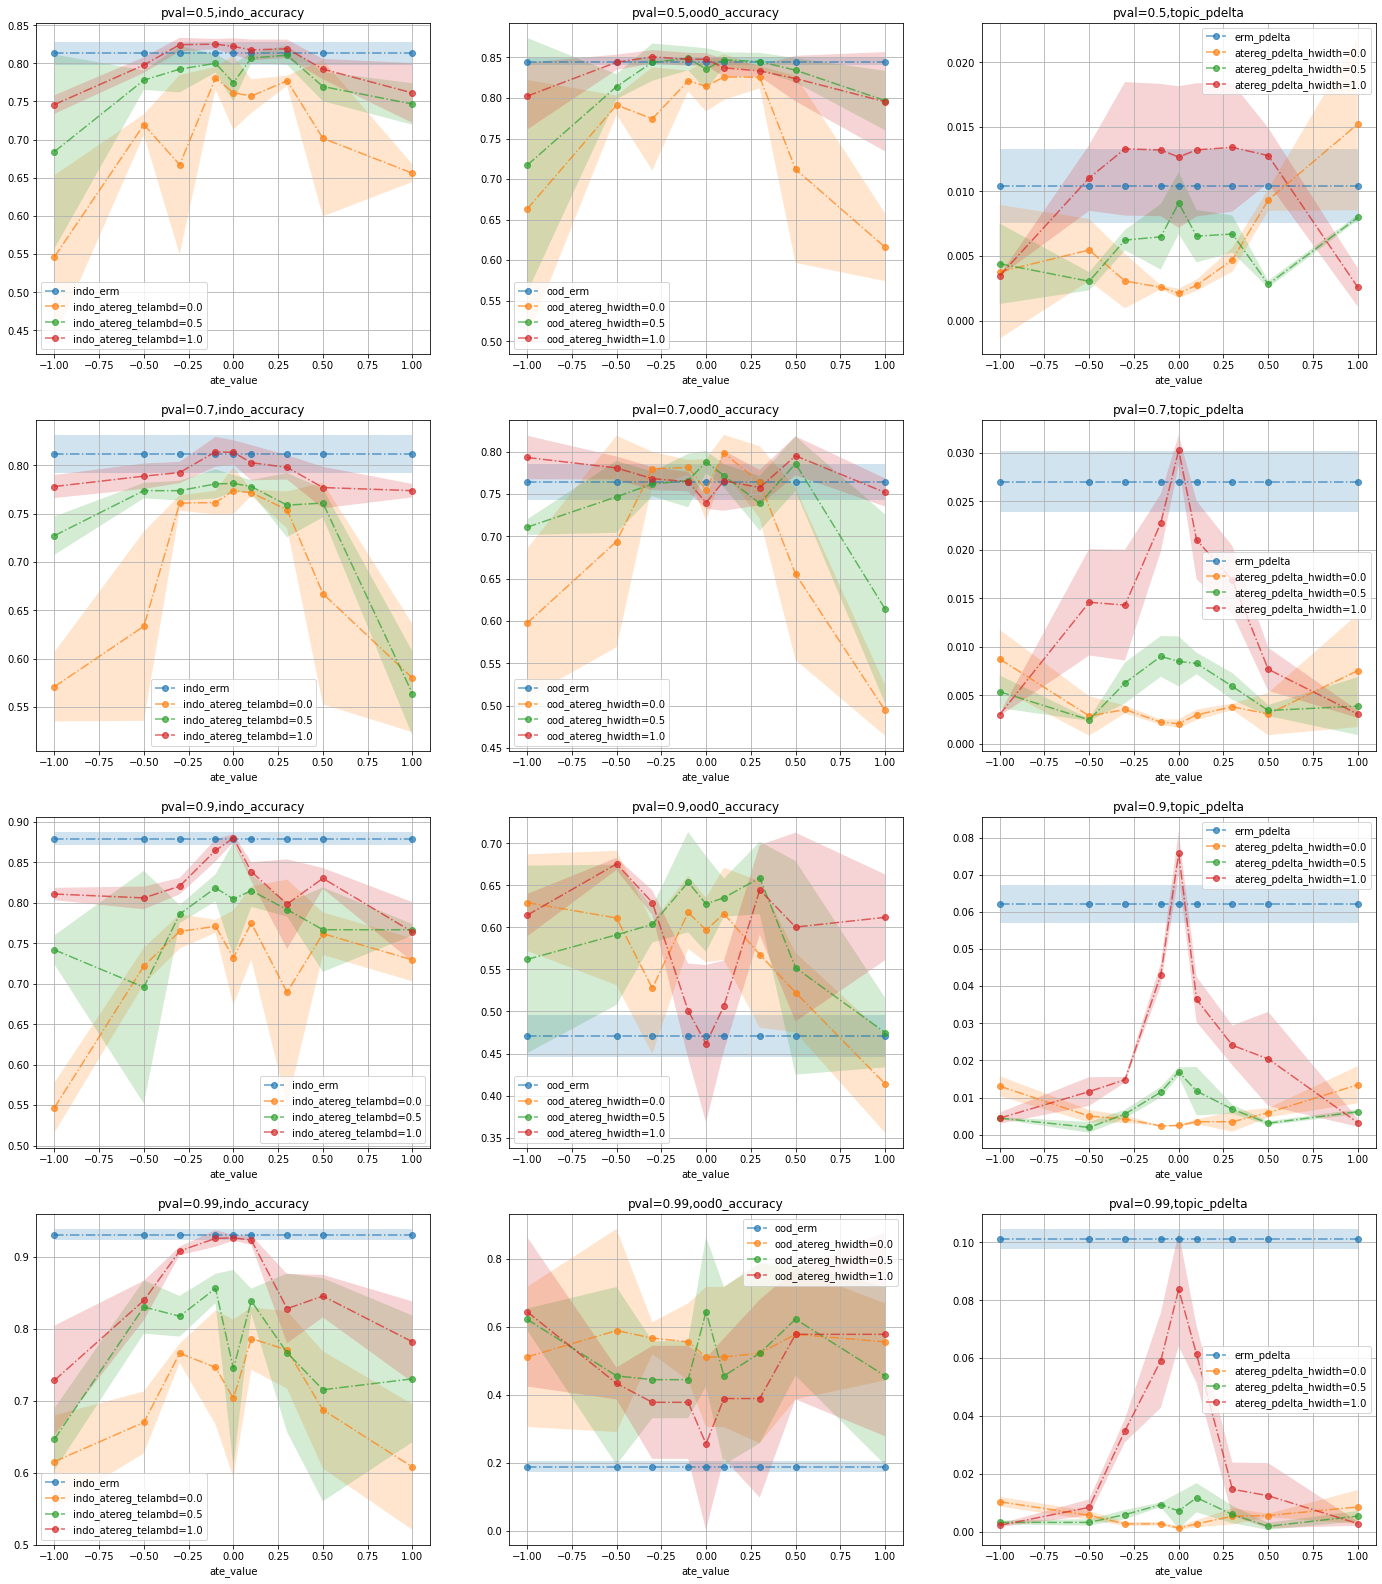

In [84]:
run_list=[0,1,2]
pval_list=[0.5,0.7,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = []
ate_list_de_loss = []
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = []
ate_list_sel_dr_acc = []


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list =  [-1.0,-0.5,-0.3,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="religion"
sample=4000
num_topics=1


telambda_list = [1,10,100,1000]
telambda=1000
noise=0.0
hwidth=0.1 #0.1 0.5 1.0
hwidth_list = [0.0,0.5,1.0]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)



#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for hwidth in hwidth_list:
    for ate_val in ate_sweep_list:
        if hwidth==0.0 and telambda<5:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 hwidth,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )


            
            
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 hpname="hwidth",
)

## Religion

In [67]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.01,0.01,0.03,0.05,0.07,0.13]
ate_list_de_loss = [0.01,0.01,0.03,0.05,0.09,0.12]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.07,0.01,0,0.05,0.12,0.1]
ate_list_sel_dr_acc = [0.0,0.01,0.09,0.1,0.13,0.15]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.1,0.0,0.1,0.3,0.5,0.7,1.0] #we also have 0.9 availabel to us for telambda upto 10k
# ate_sweep_list =  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="religion"
sample=4000
num_topics=1


telambda_list = [1,100,1000,10000]
noise=0.0

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)


            
# #Mouli: Getting the best result for the erm runs
# mouli_run_list = [0,1,2]
# mouli_mvsel="loss" #the metric used for selection criteria
# #For every pval there will be different model
# selected_inv_model = {0.5:"erm",0.6:"erm",0.7:"erm",0.8:"erm",0.9:"erm",0.99:"color"}
# #Getting the relevant files for each of the pval
# mouli_all_pval_best_result = {}
# for pval in pval_list:
#     #GEtting the fname correct
#     if selected_inv_model[pval]=="erm":
#         mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
#     else:
#         mouli_pval_fname = mouli_fname_pattern + "probe_metric_list_({})_cad.json".format(selected_inv_model[pval])
    
#     mouli_pval_list=[pval]
#     mouli_pval_best_result = plot_one_result_timeline(ax=None,
#                                  plot_item_list=None,
#                                  run_list=mouli_run_list,
#                                  pval_list=mouli_pval_list,
#                                  ate_list=[dummy_ate_val,]*len(mouli_pval_list),
#                                  fname_pattern=mouli_pval_fname.format(
#                                                      "{1}",
#                                                      "all",
#                                                      sample,
#                                                      noise,
#                                                      "{0}",
#                                                      dcf,
#                                                      mouli_mvsel,
#                                  ),
#                                  tidx=None,
#                                  title=None,
#                                  no_plot_mode=True,
#                                  print_best_result=False,
#     )
#     #Saving to the central location!
#     mouli_all_pval_best_result[pval]=mouli_pval_best_result[pval]
    


    
    
# #ERM : We have used te_lambda=0 for this experiment though!
# # dummy_ate_val = 0.0
# # erm_pval_best_result = plot_one_result_timeline(ax=None,
# #                          plot_item_list=None,
# #                          run_list=run_list,
# #                          pval_list=pval_list,
# #                          ate_list=[dummy_ate_val,]*len(pval_list),
# #                          fname_pattern=reg_fname_pattern.format(
# #                                              "{1}",
# #                                              topic_name,
# #                                              sample,
# #                                              noise,
# #                                              "{0}",
# #                                              "{2}",
# #                                              0,#telambda

# #                          ),
# #                          tidx=None,
# #                          title=None,
# #                          no_plot_mode=True,
# #                          print_best_result=False,
# # )
# #Instead of 0 telmabda run lets use the ERM created using Mouli's run. Why not
# mouli_pval_erm_fname = mouli_fname_pattern + "probe_metric_list_erm.json"
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                                  plot_item_list=None,
#                                  run_list=mouli_run_list,
#                                  pval_list=pval_list,
#                                  ate_list=[dummy_ate_val,]*len(pval_list),
#                                  fname_pattern=mouli_pval_erm_fname.format(
#                                                      "{1}",
#                                                      "all",
#                                                      sample,
#                                                      noise,
#                                                      "{0}",
#                                                      dcf,
#                                                      mouli_mvsel,
#                                  ),
#                                  tidx=None,
#                                  title=None,
#                                  no_plot_mode=True,
#                                  print_best_result=False,
#     )


#OURS (taylor swift!): Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        if telambda>5: #we have new parameter hinge wigth so name changes!
            atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 0.0,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )

        
plot_ateval_performance_spectrum_overall(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=False,
                                 savename="p2_civil_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=False,
                                 savename="p2_civil_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/civilcomments/nlp_logs/cad.civils2.rnum(0).topic(religion).sample(4000).noise(0.0).pval(0.5).t0_ate(-1.0).telambda(1)/probe_metric_list.json'

# AAE dataset + gptcf

Getting the best setting for pval:0.5


best loc : 5
overall_avg_acc:  1.37
best indo: 0.7
best ood0 : 0.67
Getting the best setting for pval:0.6


best loc : 2
overall_avg_acc:  1.34
best indo: 0.72
best ood0 : 0.62
Getting the best setting for pval:0.7


best loc : 7
overall_avg_acc:  1.32
best indo: 0.75
best ood0 : 0.57
Getting the best setting for pval:0.8


best loc : 18
overall_avg_acc:  1.3
best indo: 0.78
best ood0 : 0.52
Getting the best setting for pval:0.9


best loc : 11
overall_avg_acc:  1.26
best indo: 0.82
best ood0 : 0.45
Getting the best setting for pval:0.99


best loc : 13
overall_avg_acc:  1.25
best indo: 0.85
best ood0 : 0.4


{0.5: {'overall': 1.3702439069747925,
  'indo': 0.6991758346557617,
  'ood0': 0.6710680723190308},
 0.6: {'overall': 1.3385851780573526,
  'indo': 0.7164835135142008,
  'ood0': 0.6221016645431519},
 0.7: {'overall': 1.3214845657348633,
  'indo': 0.7486653725306193,
  'ood0': 0.572819193204244},
 0.8: {'overall': 1.2988766431808472,
  'indo': 0.7770451903343201,
  'ood0': 0.5218314528465271},
 0.9: {'overall': 1.2649557491143544,
  'indo': 0.8183319568634033,
  'ood0': 0.4466237922509511},
 0.99: {'overall': 1.2522792170445123,
  'indo': 0.850000003973643,
  'ood0': 0.40227921307086945}}

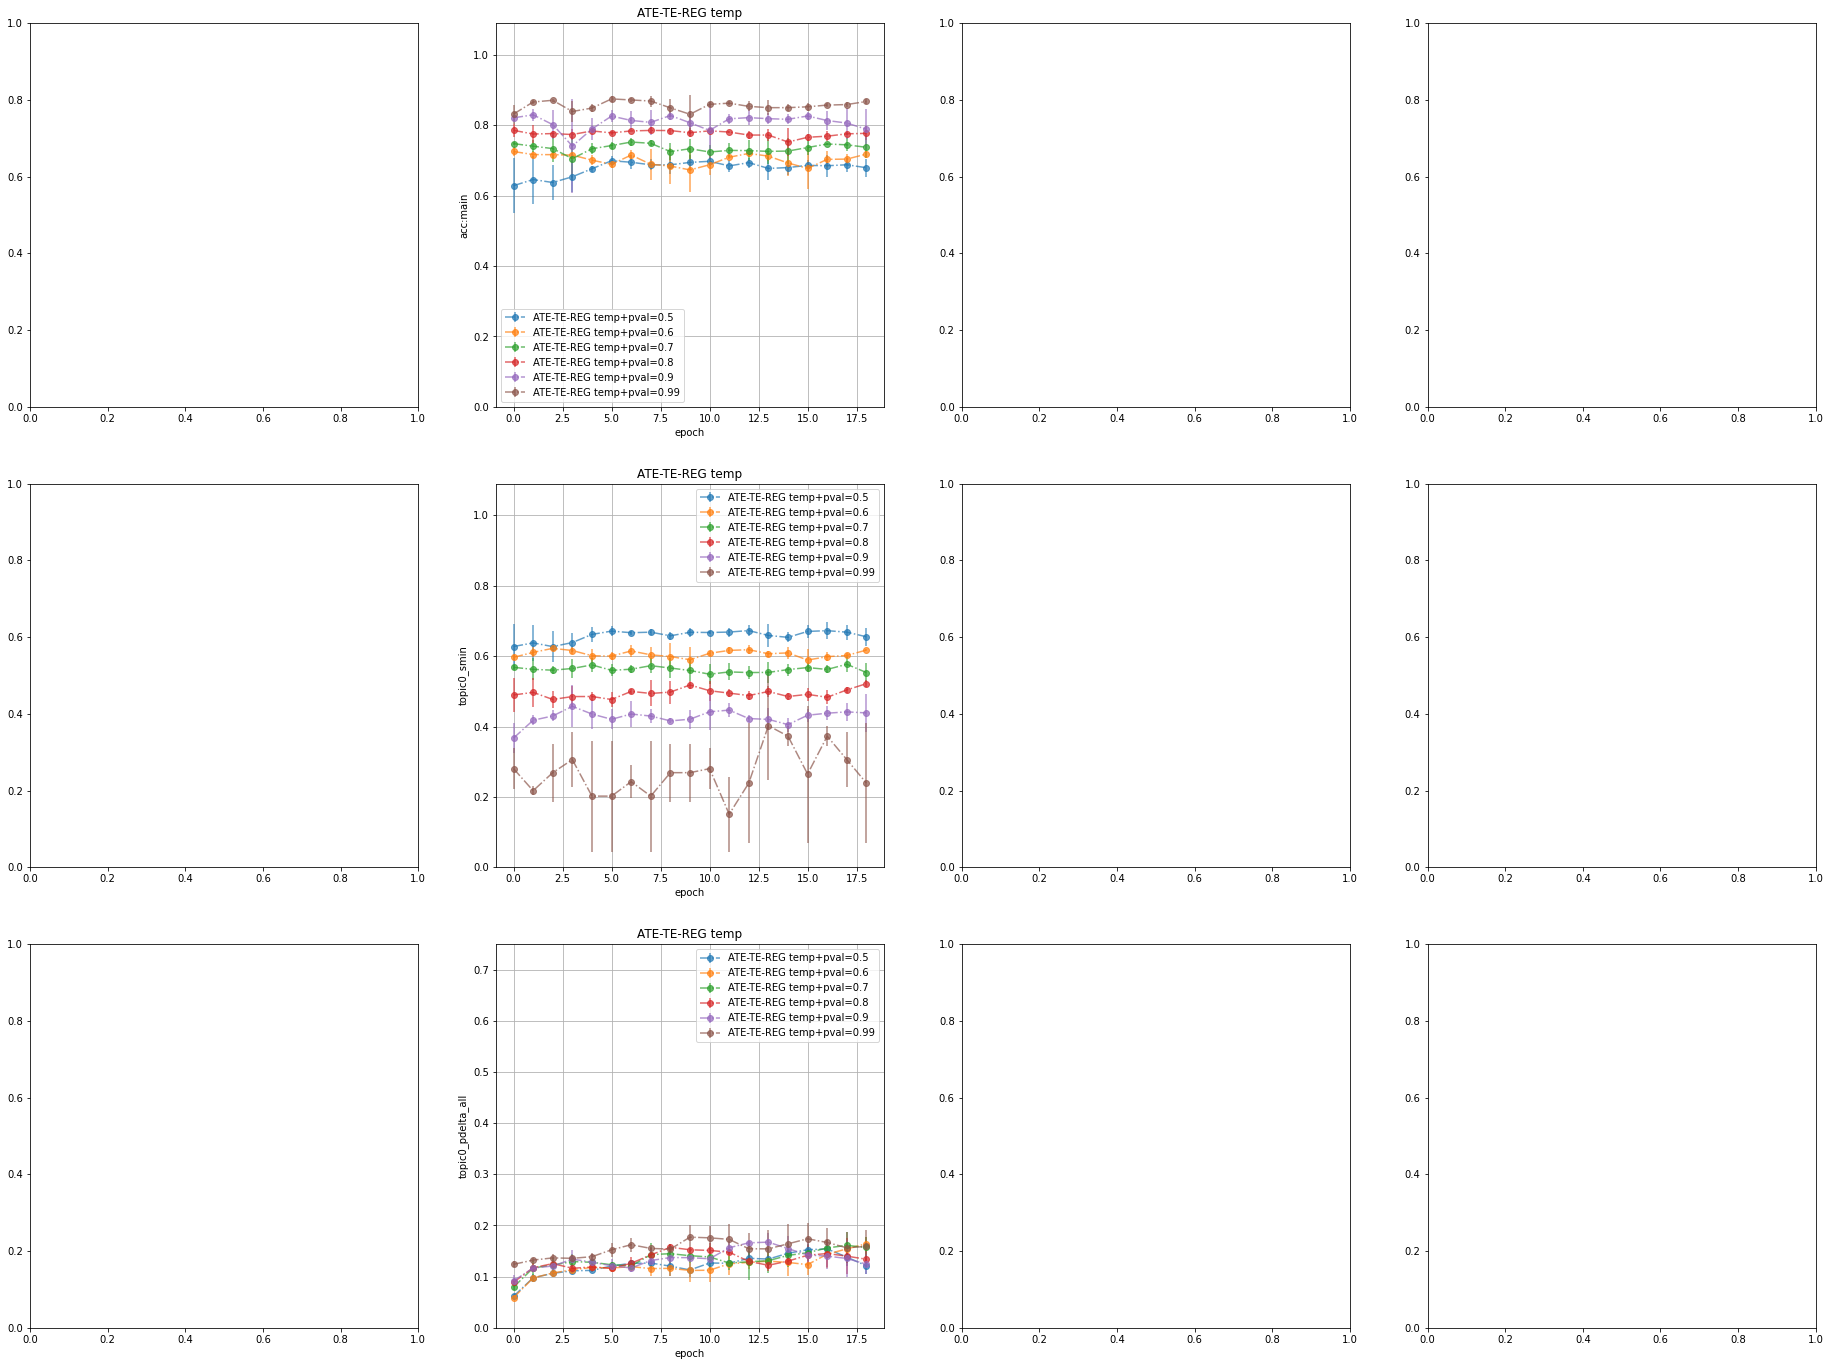

In [40]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
ate_list_de_loss = [-0.017,0.07,0.09,0.21,0.3,0.26] #(0.7,0.12 miss)
ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.15,0.26,0.04,0.31] #(0.7,0.16 miss)


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0002,0.001,0.0006,0.01,0.06,0.11] #(full slot missing)
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]

num_cols = 4

topic_name="race"
sample=10000


telambda = 5
noise=0.0
    

plot_item_list=[
            "acc:main",
            "topic0_smin",
            "topic0_pdelta_all",
#             "emb_norm",
#             "topic0_pos_con_loss",
#             "topic0_neg_con_loss",
#             "topic0_last_emb_norm",
#             "topic1_pos_con_loss",
#             "topic1_neg_con_loss",
#             "topic1_last_emb_norm",
            
]

reg_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"


plt.rcParams['figure.figsize'] = [8*num_cols, 8*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),num_cols)

# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=0,
#                          title="ERM",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_true,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=1,
#                          title="ATE-TE-REG True",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=2,
#                          title="ATE-TE-REG DE-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_de_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DE-Loss",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_acc,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=3,
#                          title="ATE-TE-REG DR-Acc",
# )
# plot_one_result_timeline(ax=ax,
#                          plot_item_list=plot_item_list,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dr_loss,
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              telambda,
                             
#                          ),
#                          tidx=5,
#                          title="ATE-TE-REG DR-Loss",
# )




plot_one_result_timeline(ax=ax,
                         plot_item_list=plot_item_list,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_sel_dr_loss,
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             telambda,
                             
                         ),
                         tidx=1,
                         title="ATE-TE-REG temp",
)

## Sweep on the treatment effect

In [23]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.006,0.087,0.12,0.193,0.24,0.38]
ate_list_de_loss = [0.009,0.085,0.13,0.189,0.24,0.38]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.16,0.26,0.04,0.31]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list = [-10.0,-1.0,-0.5,-0.1] + [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] + [2.0,3.0,5.0,10.0]
# ate_sweep_list = [-50.0,-10.0,-1.0,-0.5,-0.1] + [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] + [2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=10000
num_topics=1
mouli_telambda=100


telambda_list = [1,5]
noise=0.0
dummy_ate_val = 0.0




reg_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).erm/probe_metric_list.json"
mouli_inv_fname_pattern = "dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({}).telambda({})/"
mouli_cad_fname_pattern = "dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({})/"



#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )




#Mouli: Getting the best result for the erm runs
mouli_run_list = [0,1,2]
mouli_mvsel="loss" #the metric used for selection criteria
#For every pval there will be different model
selected_inv_model = {0.5:"race",0.6:"race",0.7:"race",0.8:"race",0.9:"race",0.99:"race"}
#Getting the relevant files for each of the pval
mouli_all_pval_best_result = {}
for pval in pval_list:
    #GEtting the fname correct
    if selected_inv_model[pval]=="erm":
        mouli_inv_pval_fname = mouli_inv_fname_pattern + "probe_metric_list_erm.json"
    else:
        mouli_inv_pval_fname = mouli_inv_fname_pattern + "probe_metric_list_({})_cad.json".format(selected_inv_model[pval])
    
    mouli_pval_list=[pval]
    mouli_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=mouli_pval_list,
                                 ate_list=[dummy_ate_val,]*len(mouli_pval_list),
                                 fname_pattern=mouli_inv_pval_fname.format(
                                                     "{1}",
                                                     topic_name,
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     mouli_mvsel,
                                                     mouli_telambda,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )
    #Saving to the central location!
    mouli_all_pval_best_result[pval]=mouli_pval_best_result[pval]
    


    
    
#ERM : We have used te_lambda=0 for this experiment though!
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=[dummy_ate_val,]*len(pval_list),
#                          fname_pattern=reg_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
#                                              "{2}",
#                                              0,#telambda

#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )
#Instead of 0 telmabda run lets use the ERM created using Mouli's run. Why not
mouli_cad_pval_erm_fname = mouli_cad_fname_pattern + "probe_metric_list_erm.json"
erm_pval_best_result = plot_one_result_timeline(ax=None,
                                 plot_item_list=None,
                                 run_list=mouli_run_list,
                                 pval_list=pval_list,
                                 ate_list=[dummy_ate_val,]*len(pval_list),
                                 fname_pattern=mouli_cad_pval_erm_fname.format(
                                                     "{1}",
                                                     topic_name,
                                                     sample,
                                                     noise,
                                                     "{0}",
                                                     mouli_mvsel,
                                 ),
                                 tidx=None,
                                 title=None,
                                 no_plot_mode=True,
                                 print_best_result=False,
    )


#OURS (taylor swift!): Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                     plot_item_list=None,
                                                     run_list=run_list,
                                                     pval_list=pval_list,
                                                     ate_list=[ate_val,]*len(pval_list),
                                                     fname_pattern=reg_fname_pattern.format(
                                                                         "{1}",
                                                                         topic_name,
                                                                         sample,
                                                                         noise,
                                                                         "{0}",
                                                                         "{2}",
                                                                         telambda,

                                                     ),
                                                     tidx=None,
                                                     title=None,
                                                     no_plot_mode=True,
                                                     print_best_result=False,
        )

        
plot_ateval_performance_spectrum_overall(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=True,
                                 savename="p2_aae_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 mouli_pval_best_result=mouli_all_pval_best_result,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=ate_list_dict,
                                 plot_mouli=True,
                                 savename="p2_aae_t{}_n{}_s{}".format(topic_name,noise,sample)
                                 
)

dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum(0).topic(race).sample(10000).noise(0.0).pval(0.5).mvsel(loss).telambda(100)/probe_metric_list_(race)_cad.json
dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum(1).topic(race).sample(10000).noise(0.0).pval(0.5).mvsel(loss).telambda(100)/probe_metric_list_(race)_cad.json
dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum(2).topic(race).sample(10000).noise(0.0).pval(0.5).mvsel(loss).telambda(100)/probe_metric_list_(race)_cad.json
dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum(0).topic(race).sample(10000).noise(0.0).pval(0.6).mvsel(loss).telambda(100)/probe_metric_list_(race)_cad.json
dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum(1).topic(race).sample(10000).noise(0.0).pval(0.6).mvsel(loss).telambda(100)/probe_metric_list_(race)_cad.json
dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum(2).topic(race).sample(10000).noise(0.0).pval(0.6).mvsel(loss).tela

KeyError: 'mean'

## Weaker point wise regularization using width

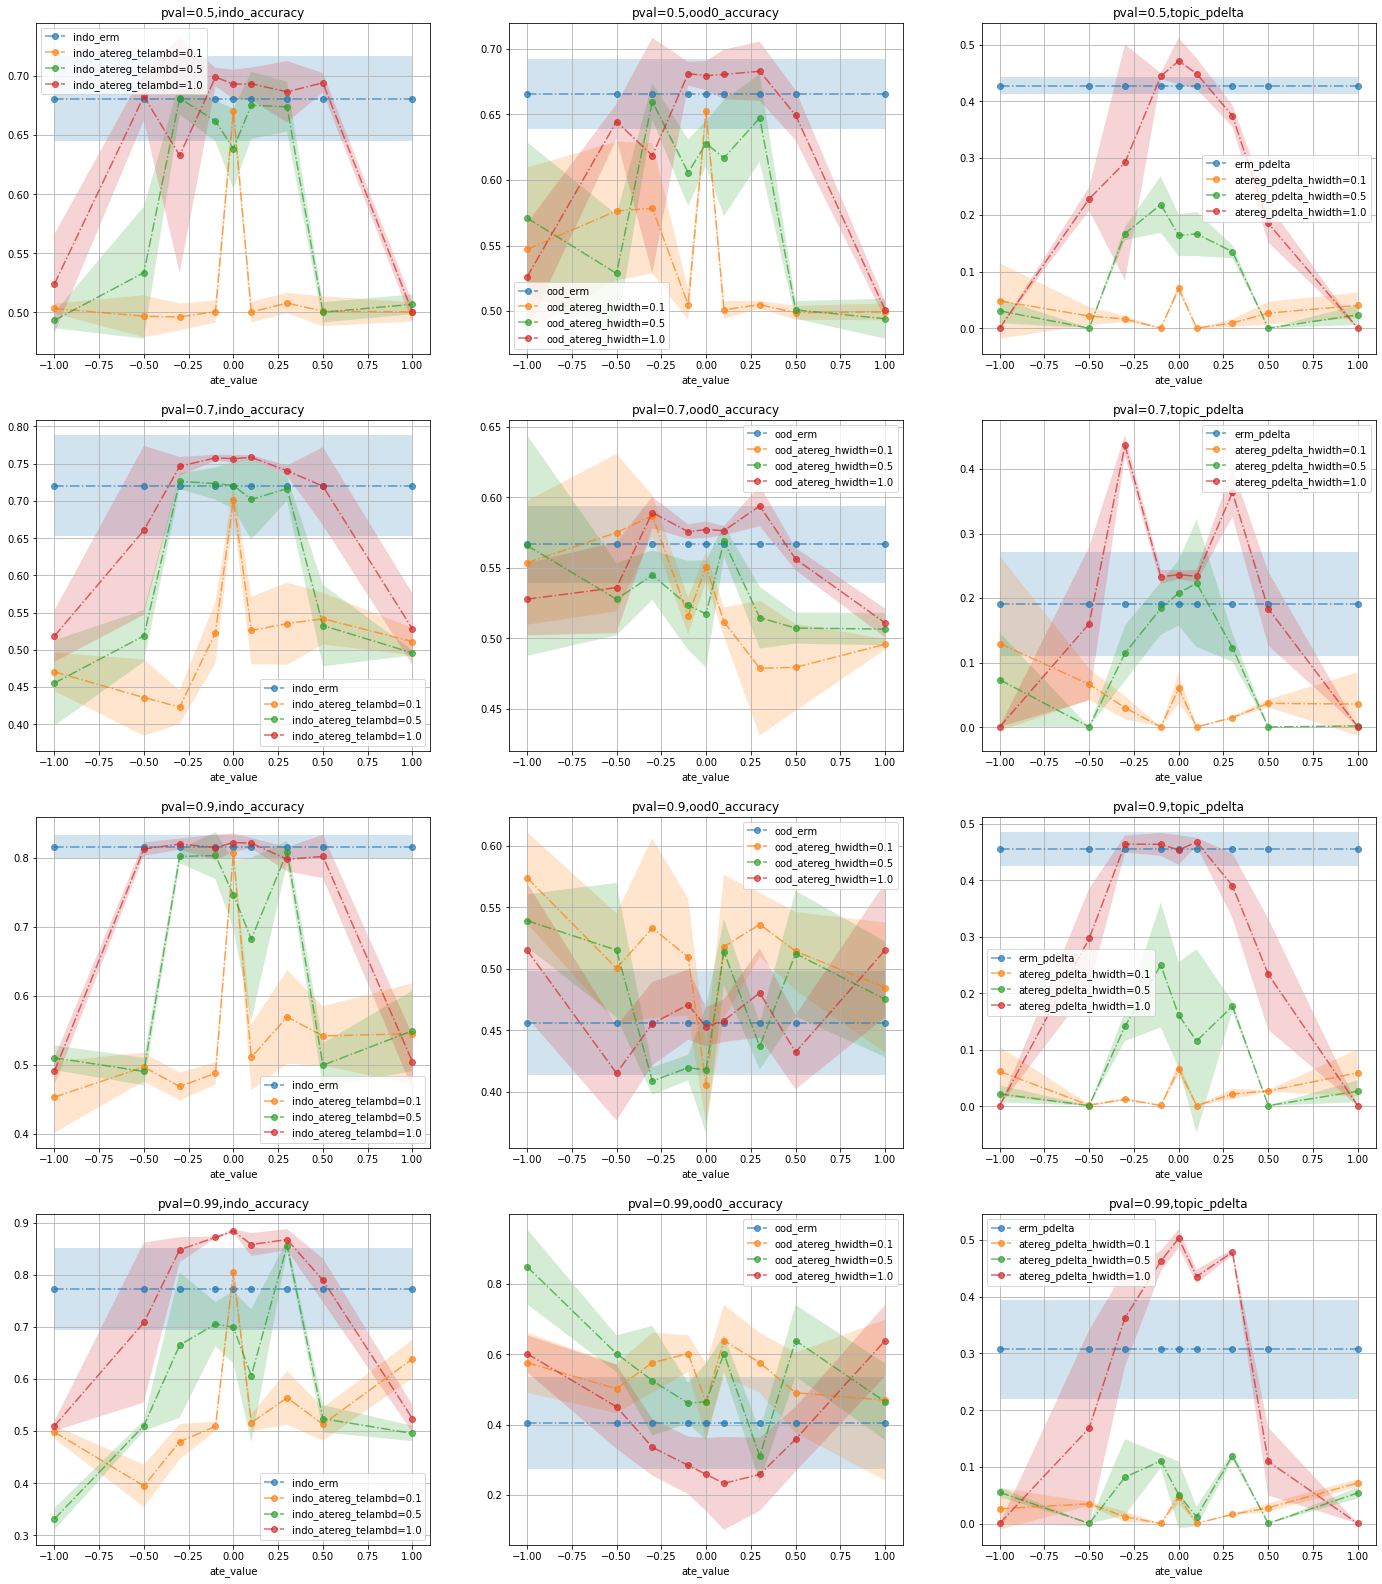

In [89]:
run_list=[0,1,2]
pval_list=[0.5,0.7,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = []
ate_list_de_loss = []
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = []
ate_list_sel_dr_acc = []


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list =  [-1.0,-0.5,-0.3,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=10000
num_topics=1


telambda_list = [1,10,100,1000]
telambda=10000
noise=0.0
hwidth=0.5 #0.1 0.5 1.0
hwidth_list = [0.1,0.5,1.0]

reg_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)



#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for hwidth in hwidth_list:
    for ate_val in ate_sweep_list:
        if hwidth==0.0 and telambda<5:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 hwidth,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )


            
            
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 hpname="hwidth",
)